# Kagglers Seen by Continents

<a id="table-of-contents"></a>
1.  [Introduction](#introduction)
2.  [Data Preparation](#data-preparation)
3.  [Demographic](#demographic)
    * 3.1. [Kagglers Continents](#kagglers-continents)
    * 3.2. [Kagglers Age](#kagglers-age)
    * 3.3. [Kagglers Compensation](#kagglers-compensation)
    * 3.4. [Kagglers Gender](#kagglers-gender)
    * 3.5. [Kagglers Education](#kagglers-education)
    * 3.6. [Kagglers Role](#kagglers-role)
4. [Programming & Machine Learning](#programming-machine-learning)
    * 4.1 [Kagglers Programming Experiences](#kagglers-programming-experiences)
    * 4.2 [Kagglers Machine Learning & Programming Experience](#kagglers-machine-learning-programming-experience)
    * 4.3 [Kagglers IDE](#kagglers-ide)
    * 4.4 [Kagglers Programming Languanges](#kagglers-programming-languages)
    * 4.5 [Kagglers Machine Learning Algorithm](#kagglers-machine-learning-algorithm)
    * 4.6 [Kagglers Machine Learning Framework](#kagglers-machine-learning-framework) 
    * 4.7 [Kagglers Visualization Libraries](#kagglers-visualization-libraries)
    * 4.8 [Kagglers Computer Vision Methods](#kagglers-computer-vision-methods)
    * 4.9 [Kagglers Natural Language Processing Methods](#kagglers-nlp-methods)
5. [Computing Power](#computing)
    * 5.1 [Kagglers Computing Platform](#kagglers-computing-platform)
    * 5.2 [Kagglers Specialized Hardware](#kagglers-specialized-hardware)
    * 5.3 [Kagglers Cloud Computing Platform](#kagglers-cloud-computing-platform)

<a id="introduction"></a>
[back to top](#table-of-contents)
## 1. Introduction

Kaggle conducts an industry-wide survey that presents a truly comprehensive view of the state of data science and machine learning. The survey was live for 3.5 weeks in October with 20,036 responses.

The challenge objective: tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration. A “story” could be defined any number of ways, and that’s deliberate. The challenge is to deeply explore (through data) the impact, priorities, or concerns of a specific group of data science and machine learning practitioners. This notebook tries to see Kagglers from the **perspective of continents**. 

[back to top](#table-of-contents)
<a id="data-preparation"></a>
## 2. Data Preparation
This section is used for loading packages and preparing dataset. Dataset preparation includes loading continent dataset, shortening some long countries name and merging some genders. In the process of the preparing dataset, we also split dataset to each continents for ease use in the analysis.

In the preparation process, we have countries that are marked "Others", so it can not be mapped to its respective continents, leaving it into Others continents.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import squarify
from sklearn import preprocessing
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 20100)

In [2]:
# load survey and continent data
survey2020_df = pd.read_csv("/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")
continents_df = pd.read_csv("/kaggle/input/2020-kaggle-survey-supporting/2020 Continents.csv")

continents_dict = d = {k:v for k,v in zip(continents_df["Country"],continents_df["Continents"])}
# delete the first row
survey2020_df.drop(survey2020_df.index[0], inplace=True)
# add continent columns
survey2020_df["Continents"] = survey2020_df["Q3"].map(continents_dict)
# replacing long name countries
country_long_name_dict = {"United States of America": "USA", 
                          "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                          "Iran, Islamic Republic of...": "Iran"
                         }
survey2020_df["Q3"] = survey2020_df["Q3"].replace(country_long_name_dict)
# replacing gender other than man and woman into others
gender_dict = {"Nonbinary": "Others", "Prefer not to say": "Others", "Prefer to self-describe": "Others"}
survey2020_df["Q2"] = survey2020_df["Q2"].replace(gender_dict)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# splitting data into continents
survey2020_asia_df = survey2020_df[survey2020_df["Continents"]=="Asia"]
survey2020_america_df = survey2020_df[survey2020_df["Continents"]=="America"]
survey2020_europe_df = survey2020_df[survey2020_df["Continents"]=="Europe"]
survey2020_africa_df = survey2020_df[survey2020_df["Continents"]=="Africa"]
survey2020_australia_df = survey2020_df[survey2020_df["Continents"]=="Australia"]
survey2020_others_df = survey2020_df[survey2020_df["Continents"]=="Others"]

<a id="demographic"></a>
[back to top](#table-of-contents)
## 3. Demographic
In this section, we are going to see Kagglers from demographic perspective which consists of location, age, compensation, gender, education and their roles.

<a id="kagglers-continents"></a>
[back to top](#table-of-contents)
### 3.1 Kagglers Continents

The interesting things are:
* Asia is dominating in terms of #no of Kaggler and it's mostly come from India. Right now, India has the most Kaggler in the world and there is no others country that can match it. 
* Except for European continents, there is always 1 country that dominating in every continent like USA, Nigeria and Australia.
* Kagglers from Australia continents come from Australia country only.

In [4]:
# Continents
continents_count_df = pd.DataFrame(survey2020_df["Continents"].value_counts())
continents_count_df.columns = ["Count"]
continents_count_df["Percentage"] = continents_count_df["Count"].apply(lambda x: (x/sum(continents_count_df["Count"])*100))
continents_count_df = pd.DataFrame(continents_count_df.unstack()).reset_index(drop=False)
continents_count_df = continents_count_df.iloc[6:12, 1:3]
continents_count_df.columns = ["Continents", "Percentage"]
continents_count_df = continents_count_df.reset_index(drop=True)
continents_count_df = continents_count_df.set_index('Continents')
continents_count_df = continents_count_df.T

# Asia
asia_country_count_df = pd.DataFrame(survey2020_asia_df["Q3"].value_counts())
asia_country_count_df = asia_country_count_df.reset_index(drop=False)
asia_country_count_df.columns = ["Country","Count"]

# America
america_country_count_df = pd.DataFrame(survey2020_america_df["Q3"].value_counts())
america_country_count_df = america_country_count_df.reset_index(drop=False)
america_country_count_df.columns = ["Country","Count"]

# Europe
europe_country_count_df = pd.DataFrame(survey2020_europe_df["Q3"].value_counts())
europe_country_count_df = europe_country_count_df.reset_index(drop=False)
europe_country_count_df.columns = ["Country","Count"]

# Africa
africa_country_count_df = pd.DataFrame(survey2020_africa_df["Q3"].value_counts())
africa_country_count_df = africa_country_count_df.reset_index(drop=False)
africa_country_count_df.columns = ["Country","Count"]

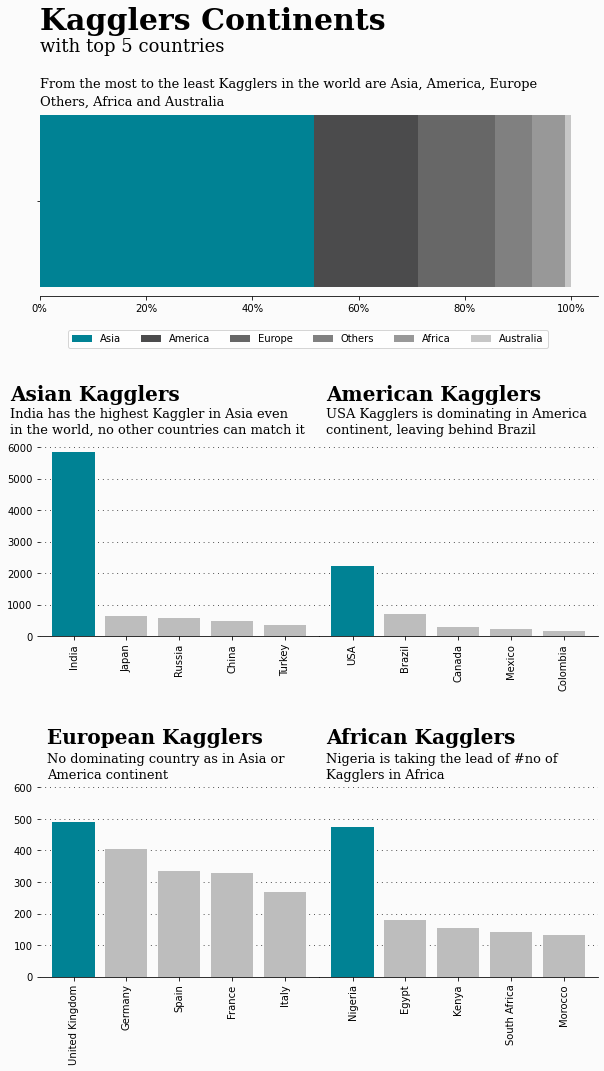

In [5]:
# Setting up figure and axes
fig = plt.figure(figsize=(10,16)) # create figure
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0], ylim=(0, 6000)) # create axes
ax2 = fig.add_subplot(gs[1, 1], ylim=(0, 6000)) # create axes
ax3 = fig.add_subplot(gs[2, 0], ylim=(0, 600)) # create axes
ax4 = fig.add_subplot(gs[2, 1], ylim=(0, 600)) # create axes

# Color selection
color_map = ["#bdbdbd" for _ in range(5)]
color_map[0] = "#008294"

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color

# Continents
ax0.barh(continents_count_df.index, continents_count_df['Asia'],
       color="#008294", zorder=3, label="Asia"
)
ax0.barh(continents_count_df.index, continents_count_df['America'], 
       left=continents_count_df['Asia'],
       color="#4b4b4c", zorder=3, label="America"
)
ax0.barh(continents_count_df.index, continents_count_df['Europe'], 
       left=continents_count_df['America']+continents_count_df['Asia'],
       color="#676767", zorder=3, label="Europe"
)
ax0.barh(continents_count_df.index, continents_count_df['Others'], 
       left=continents_count_df['Europe']+continents_count_df['America']+continents_count_df['Asia'],
       color="#808080", zorder=3, label="Others"
)
ax0.barh(continents_count_df.index, continents_count_df['Africa'], 
       left=continents_count_df['Others']+continents_count_df['Europe']+continents_count_df['America']
       +continents_count_df['Asia'],
       color="#989898", zorder=3, label="Africa"
)
ax0.barh(continents_count_df.index, continents_count_df['Australia'], 
       left=continents_count_df['Africa']+continents_count_df['Others']+continents_count_df['Europe']
       +continents_count_df['America']+continents_count_df['Asia'],
       color="#c6c6c6", zorder=3, label="Australia"
)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.xaxis.set_major_formatter(mtick.PercentFormatter())    
ax0.legend(loc='lower center', ncol=6, bbox_to_anchor=(0.48, -0.3))

ax0.text(0, 0.8, 
         'Kagglers Continents', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif')

ax0.text(0, 0.7, 
         'with top 5 countries', 
         fontsize=18, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(0, 0.53, 
         'From the most to the least Kagglers in the world are Asia, America, Europe', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(0, 0.45, 
         'Others, Africa and Australia', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')


# Asia
asia_country = asia_country_count_df["Country"]
ax1.bar(asia_country_count_df.iloc[0:5, 0], asia_country_count_df.iloc[0:5, 1], 
       color=color_map, zorder=3
)
ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_xticklabels(asia_country_count_df['Country'], rotation=90)

ax1.text(-1.2, 7500, 
         'Asian Kagglers', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif')

ax1.text(-1.2, 6950, 
         'India has the highest Kaggler in Asia even', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax1.text(-1.2, 6450, 
         'in the world, no other countries can match it', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

# America
america_country = america_country_count_df["Country"]
ax2.bar(america_country_count_df.iloc[0:5, 0], america_country_count_df.iloc[0:5, 1], 
       color=color_map, zorder=3
)
ax2.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.set_xticklabels(america_country_count_df['Country'], rotation=90)

ax2.text(-0.5, 7500, 
         'American Kagglers', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif')

ax2.text(-0.5, 6950, 
         'USA Kagglers is dominating in America', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax2.text(-0.5, 6450, 
         'continent, leaving behind Brazil', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

# Europe
europe_country = europe_country_count_df["Country"]
ax3.bar(europe_country_count_df.iloc[0:5, 0], europe_country_count_df.iloc[0:5, 1], 
       color=color_map, zorder=3
)
ax3.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.set_xticklabels(europe_country_count_df['Country'], rotation=90)

ax3.text(-0.5, 740, 
         'European Kagglers', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif')

ax3.text(-0.5, 680, 
         'No dominating country as in Asia or', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax3.text(-0.5, 630, 
         'America continent', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

# Africa
africa_country = africa_country_count_df["Country"]
ax4.bar(africa_country_count_df.iloc[0:5, 0], africa_country_count_df.iloc[0:5, 1], 
       color=color_map, zorder=3
)
ax4.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax4.set_xticklabels(africa_country_count_df['Country'], rotation=90)

ax4.text(-0.5, 740, 
         'African Kagglers', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif')

ax4.text(-0.5, 680, 
         'Nigeria is taking the lead of #no of', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax4.text(-0.5, 630, 
         'Kagglers in Africa', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

# Remove top, right and left line 
for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    
ax0.set_yticklabels([])
ax2.set_yticklabels([])
ax4.set_yticklabels([])

ax2.tick_params(left=False)
ax4.tick_params(left=False)

<a id="kagglers-age"></a>
[back to top](#table-of-contents)
### 3.2. Kagglers Age

The interesting things are:
* Kaggle is dominated by young people with age below 30 years, with peak at age 25-29
* We can classify Kaggler age range into 3 category: (1) Asia is dominated by age 18-21, (2) America, Europe, Others and Australia are dominated by age 25-29 and (3) Africa is dominated by age 22-24.
* Asia has the most young Kagglers from age 18-22 and the interest going down as the age increases. It seems "data related job" has a big interest for younger Asian.
* The age distribution are quite same between America, Europe and Others continents, a more mature age compared to Asia Kaggler.
* Australia has a more varies Kaggler, the age that join Kaggle quite more stable for more mature Kagglers (30-49 years old).

In [6]:
continents_count_df = pd.DataFrame(survey2020_df["Q1"].value_counts())
continents_count_df = continents_count_df.reset_index(drop=False)
continents_count_df.columns = ["Age","Count"]
continents_count_df = continents_count_df.sort_values(by="Age")

asia_country_count_df = pd.DataFrame(survey2020_asia_df["Q1"].value_counts())
asia_country_count_df = asia_country_count_df.reset_index(drop=False)
asia_country_count_df.columns = ["Age","Count"]
asia_country_count_df = asia_country_count_df.sort_values(by="Age")

america_country_count_df = pd.DataFrame(survey2020_america_df["Q1"].value_counts())
america_country_count_df = america_country_count_df.reset_index(drop=False)
america_country_count_df.columns = ["Age","Count"]
america_country_count_df = america_country_count_df.sort_values(by="Age")

europe_country_count_df = pd.DataFrame(survey2020_europe_df["Q1"].value_counts())
europe_country_count_df = europe_country_count_df.reset_index(drop=False)
europe_country_count_df.columns = ["Age","Count"]
europe_country_count_df = europe_country_count_df.sort_values(by="Age")

others_country_count_df = pd.DataFrame(survey2020_others_df["Q1"].value_counts())
others_country_count_df = others_country_count_df.reset_index(drop=False)
others_country_count_df.columns = ["Age","Count"]
others_country_count_df = others_country_count_df.sort_values(by="Age")

africa_country_count_df = pd.DataFrame(survey2020_africa_df["Q1"].value_counts())
africa_country_count_df = africa_country_count_df.reset_index(drop=False)
africa_country_count_df.columns = ["Age","Count"]
africa_country_count_df = africa_country_count_df.sort_values(by="Age")

australia_country_count_df = pd.DataFrame(survey2020_australia_df["Q1"].value_counts())
australia_country_count_df = australia_country_count_df.reset_index(drop=False)
australia_country_count_df.columns = ["Age","Count"]
australia_country_count_df = australia_country_count_df.sort_values(by="Age")

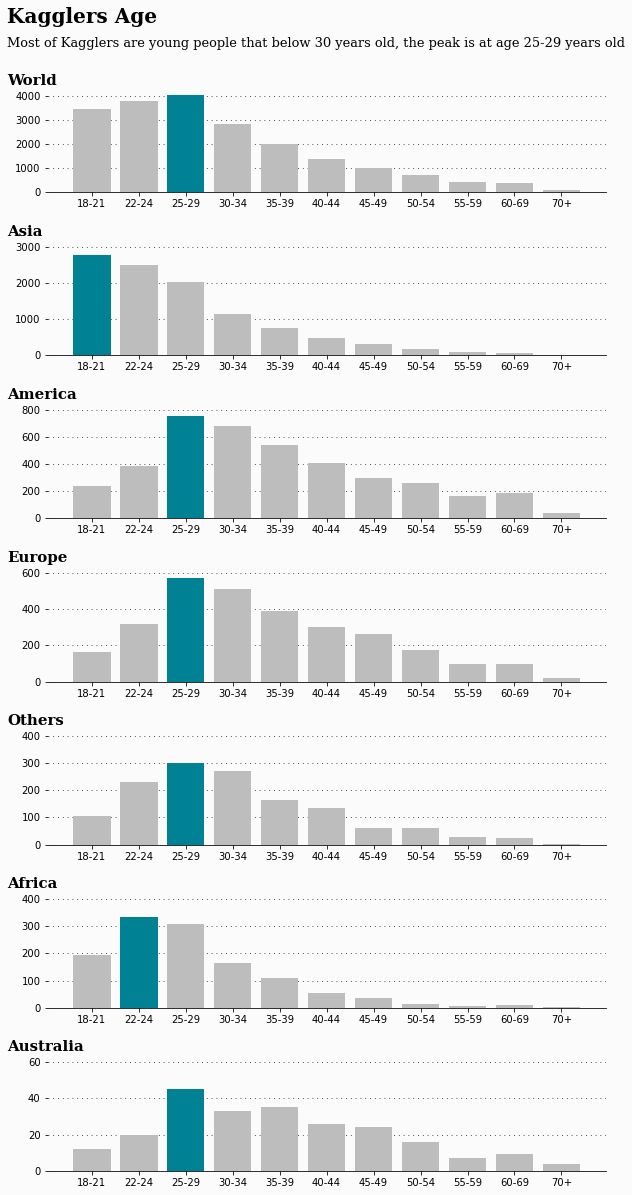

In [7]:
# Setting up figure and axes
fig = plt.figure(figsize=(10,20)) # create figure
gs = fig.add_gridspec(7, 1)
gs.update(wspace=0, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0], ylim=(0, 4500))
ax1 = fig.add_subplot(gs[1, 0], ylim=(0, 3000)) # create axes
ax2 = fig.add_subplot(gs[2, 0], ylim=(0, 800)) # create axes
ax3 = fig.add_subplot(gs[3, 0], ylim=(0, 600)) # create axes
ax4 = fig.add_subplot(gs[4, 0], ylim=(0, 400)) # create axes
ax5 = fig.add_subplot(gs[5, 0], ylim=(0, 400)) # create axes
ax6 = fig.add_subplot(gs[6, 0], ylim=(0, 60)) # create axes


# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color
ax6.set_facecolor(background_color) # axes background color

# World
color_map = ["#bdbdbd" for _ in range(11)]
color_map[2] = "#008294"

ax0.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(continents_count_df["Age"], continents_count_df['Count'], 
       color=color_map, zorder=3
)

ax0.text(-1.8, 4450, 
         'World', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(-1.8, 7000, 
         'Kagglers Age', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(-1.8, 6000, 
         'Most of Kagglers are young people that below 30 years old, the peak is at age 25-29 years old', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

# Asia
color_map = ["#bdbdbd" for _ in range(11)]
color_map[0] = "#008294"

ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.bar(asia_country_count_df["Age"], asia_country_count_df['Count'], 
       color=color_map, zorder=3
)

ax1.text(-1.8, 3300, 
         'Asia', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

# America
color_map = ["#bdbdbd" for _ in range(11)]
color_map[2] = "#008294"

ax2.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(america_country_count_df["Age"], america_country_count_df['Count'], 
       color=color_map, zorder=3
)

ax2.text(-1.8, 880, 
         'America', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

# Europe
color_map = ["#bdbdbd" for _ in range(11)]
color_map[2] = "#008294"

ax3.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.bar(europe_country_count_df["Age"], europe_country_count_df['Count'], 
       color=color_map, zorder=3
)

ax3.text(-1.8, 660, 
         'Europe', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

# Others
ax4.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax4.bar(others_country_count_df["Age"], others_country_count_df['Count'], 
       color=color_map, zorder=3
)

ax4.text(-1.8, 440, 
         'Others', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

# Africa
color_map = ["#bdbdbd" for _ in range(11)]
color_map[1] = "#008294"

ax5.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.bar(africa_country_count_df["Age"], africa_country_count_df['Count'], 
       color=color_map, zorder=3
)

ax5.text(-1.8, 440, 
         'Africa', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

# Australia
color_map = ["#bdbdbd" for _ in range(11)]
color_map[2] = "#008294"

ax6.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax6.bar(australia_country_count_df["Age"], australia_country_count_df['Count'], 
       color=color_map, zorder=3
)

ax6.text(-1.8, 66, 
         'Australia', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)

<a id="kagglers-compensation"></a>
[back to top](#table-of-contents)
### 3.3. Kagglers Compensation

The interesting things are:
* Most of Kaggler compensation is USD 0-999/year. This may raise a question, if the respondents have answer it correctly in a yearly basis because it seems too low.

As USD 0-999/year bracket shifting our view, we try to exclude it and we find:
* Asian Kaggler compensation are varies from USD 1,000-80,000/year.
* American Kaggler are paid higher compared to other Kaggler in a range of USD 100,000-199,000/year.
* European and Others Kaggler are quite the same, they are paid in range of USD 30,000-79,999/year and are paid more higher compared to Asian Kaggler.
* It seems that African Kaggler are paid lower compared to others Kaggler while Australia Kaggler are in range of USD 40,000-149,999/year.

In [8]:
compensation_categorical_list = ["$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999", 
                                 "5,000-7,499", "7,500-9,999", "10,000-14,999", "15,000-19,999", 
                                 "20,000-24,999", "25,000-29,999", "30,000-39,999", "40,000-49,999", 
                                 "50,000-59,999", "60,000-69,999", "70,000-79,999", "80,000-89,999", "90,000-99,999", 
                                 "100,000-124,999", "125,000-149,999", "150,000-199,999", "200,000-249,999", 
                                 "250,000-299,999", "300,000-500,000", "> $500,000"]

continents_count_df = pd.DataFrame(survey2020_df["Q24"].value_counts())
continents_count_df = continents_count_df.reset_index(drop=False)
continents_count_df.columns = ["Compensation","Count"]
continents_count_df["Compensation"] = pd.Categorical(
    continents_count_df["Compensation"], compensation_categorical_list)
continents_count_df = continents_count_df.sort_values(by="Compensation")

asia_country_count_df = pd.DataFrame(survey2020_asia_df["Q24"].value_counts())
asia_country_count_df = asia_country_count_df.reset_index(drop=False)
asia_country_count_df.columns = ["Compensation","Count"]
asia_country_count_df["Compensation"] = pd.Categorical(
    asia_country_count_df["Compensation"], compensation_categorical_list)
asia_country_count_df = asia_country_count_df.sort_values(by="Compensation")

america_country_count_df = pd.DataFrame(survey2020_america_df["Q24"].value_counts())
america_country_count_df = america_country_count_df.reset_index(drop=False)
america_country_count_df.columns = ["Compensation","Count"]
america_country_count_df["Compensation"] = pd.Categorical(
    america_country_count_df["Compensation"], compensation_categorical_list)
america_country_count_df = america_country_count_df.sort_values(by="Compensation")

europe_country_count_df = pd.DataFrame(survey2020_europe_df["Q24"].value_counts())
europe_country_count_df = europe_country_count_df.reset_index(drop=False)
europe_country_count_df.columns = ["Compensation","Count"]
europe_country_count_df["Compensation"] = pd.Categorical(
    europe_country_count_df["Compensation"], compensation_categorical_list)
europe_country_count_df = europe_country_count_df.sort_values(by="Compensation")

others_country_count_df = pd.DataFrame(survey2020_others_df["Q24"].value_counts())
others_country_count_df = others_country_count_df.reset_index(drop=False)
others_country_count_df.columns = ["Compensation","Count"]
others_country_count_df["Compensation"] = pd.Categorical(
    others_country_count_df["Compensation"], compensation_categorical_list)
others_country_count_df = others_country_count_df.sort_values(by="Compensation")

africa_country_count_df = pd.DataFrame(survey2020_africa_df["Q24"].value_counts())
africa_country_count_df = africa_country_count_df.reset_index(drop=False)
africa_country_count_df.columns = ["Compensation","Count"]
africa_country_count_df["Compensation"] = pd.Categorical(
    africa_country_count_df["Compensation"], compensation_categorical_list)
africa_country_count_df = africa_country_count_df.sort_values(by="Compensation")

australia_country_count_df = pd.DataFrame(survey2020_australia_df["Q24"].value_counts())
australia_country_count_df = australia_country_count_df.reset_index(drop=False)
australia_country_count_df.columns = ["Compensation","Count"]
australia_country_count_df["Compensation"] = pd.Categorical(
    australia_country_count_df["Compensation"], compensation_categorical_list)
australia_country_count_df = australia_country_count_df.sort_values(by="Compensation")

# Merging into 1 dataframe
continents_count_df = continents_count_df.set_index("Compensation")
asia_country_count_df = asia_country_count_df.set_index("Compensation")
america_country_count_df = america_country_count_df.set_index("Compensation")
europe_country_count_df = europe_country_count_df.set_index("Compensation")
others_country_count_df = others_country_count_df.set_index("Compensation")
africa_country_count_df = africa_country_count_df.set_index("Compensation")
australia_country_count_df = australia_country_count_df.set_index("Compensation")
all_country_count_df = pd.DataFrame()
all_country_count_df = pd.concat([
    asia_country_count_df, america_country_count_df,
    europe_country_count_df, others_country_count_df,
    africa_country_count_df, australia_country_count_df
    ], axis=1
)
all_country_count_df.columns = ["Asia", "America", "Europe", "Others", "Africa", "Australia"]
all_country_count_df = all_country_count_df.fillna(0)
continents_count_df.columns = ["World"]

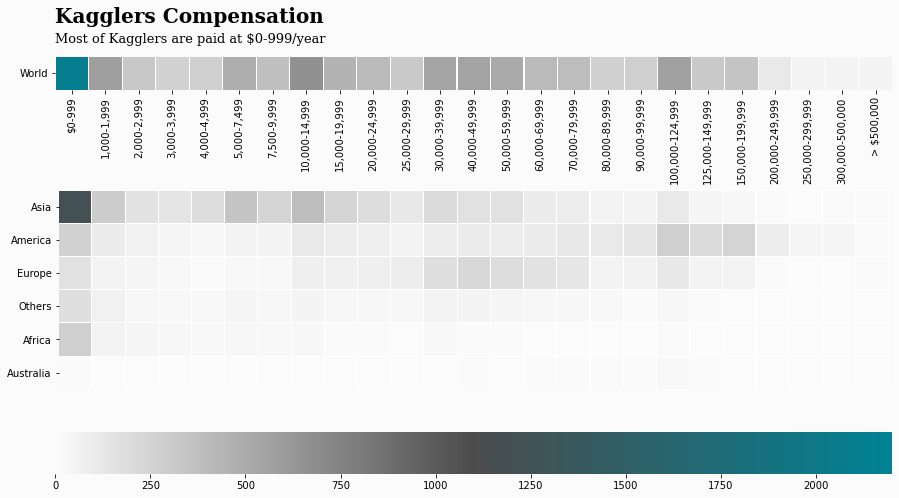

In [9]:
# Setting up figure and axes
fig = plt.figure(figsize=(15,10)) # create figure
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=-0.09)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

colors = ["#fbfbfb", "#4b4b4c","#008294"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=continents_count_df.T, linewidths=.1, vmin=0, vmax=2200,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap)

sns.heatmap(ax=ax1, data=all_country_count_df.T, linewidths=.1, vmin=0, vmax=2200,
            square=True, cbar_kws={"orientation": "horizontal"}, cmap=colormap)

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color

ax0.set_xlabel("")
ax1.set_xlabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    
ax0.text(0, -1, 
         'Kagglers Compensation', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.4, 
         'Most of Kagglers are paid at $0-999/year', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.set_yticklabels(["World"], rotation=0)

ax1.set_xticklabels([])
ax1.tick_params(bottom=False)

In [10]:
survey2020_2_df = survey2020_df[survey2020_df["Q24"]!="$0-999"]
survey2020_asia_2_df = survey2020_asia_df[survey2020_asia_df["Q24"]!="$0-999"]
survey2020_america_2_df = survey2020_america_df[survey2020_america_df["Q24"]!="$0-999"]
survey2020_europe_2_df = survey2020_europe_df[survey2020_europe_df["Q24"]!="$0-999"]
survey2020_others_2_df = survey2020_others_df[survey2020_others_df["Q24"]!="$0-999"]
survey2020_africa_2_df = survey2020_africa_df[survey2020_africa_df["Q24"]!="$0-999"]
survey2020_australia_2_df = survey2020_australia_df[survey2020_australia_df["Q24"]!="$0-999"]

continents_count_df = pd.DataFrame(survey2020_2_df["Q24"].value_counts())
continents_count_df = continents_count_df.reset_index(drop=False)
continents_count_df.columns = ["Compensation","Count"]
continents_count_df["Compensation"] = pd.Categorical(
    continents_count_df["Compensation"], compensation_categorical_list)
continents_count_df = continents_count_df.sort_values(by="Compensation")

asia_country_count_df = pd.DataFrame(survey2020_asia_2_df["Q24"].value_counts())
asia_country_count_df = asia_country_count_df.reset_index(drop=False)
asia_country_count_df.columns = ["Compensation","Count"]
asia_country_count_df["Compensation"] = pd.Categorical(
    asia_country_count_df["Compensation"], compensation_categorical_list)
asia_country_count_df = asia_country_count_df.sort_values(by="Compensation")

america_country_count_df = pd.DataFrame(survey2020_america_2_df["Q24"].value_counts())
america_country_count_df = america_country_count_df.reset_index(drop=False)
america_country_count_df.columns = ["Compensation","Count"]
america_country_count_df["Compensation"] = pd.Categorical(
    america_country_count_df["Compensation"], compensation_categorical_list)
america_country_count_df = america_country_count_df.sort_values(by="Compensation")

europe_country_count_df = pd.DataFrame(survey2020_europe_2_df["Q24"].value_counts())
europe_country_count_df = europe_country_count_df.reset_index(drop=False)
europe_country_count_df.columns = ["Compensation","Count"]
europe_country_count_df["Compensation"] = pd.Categorical(
    europe_country_count_df["Compensation"], compensation_categorical_list)
europe_country_count_df = europe_country_count_df.sort_values(by="Compensation")

others_country_count_df = pd.DataFrame(survey2020_others_2_df["Q24"].value_counts())
others_country_count_df = others_country_count_df.reset_index(drop=False)
others_country_count_df.columns = ["Compensation","Count"]
others_country_count_df["Compensation"] = pd.Categorical(
    others_country_count_df["Compensation"], compensation_categorical_list)
others_country_count_df = others_country_count_df.sort_values(by="Compensation")

africa_country_count_df = pd.DataFrame(survey2020_africa_2_df["Q24"].value_counts())
africa_country_count_df = africa_country_count_df.reset_index(drop=False)
africa_country_count_df.columns = ["Compensation","Count"]
africa_country_count_df["Compensation"] = pd.Categorical(
    africa_country_count_df["Compensation"], compensation_categorical_list)
africa_country_count_df = africa_country_count_df.sort_values(by="Compensation")

australia_country_count_df = pd.DataFrame(survey2020_australia_2_df["Q24"].value_counts())
australia_country_count_df = australia_country_count_df.reset_index(drop=False)
australia_country_count_df.columns = ["Compensation","Count"]
australia_country_count_df["Compensation"] = pd.Categorical(
    australia_country_count_df["Compensation"], compensation_categorical_list)
australia_country_count_df = australia_country_count_df.sort_values(by="Compensation")

# Merging into 1 dataframe
continents_count_df = continents_count_df.set_index("Compensation")
asia_country_count_df = asia_country_count_df.set_index("Compensation")
america_country_count_df = america_country_count_df.set_index("Compensation")
europe_country_count_df = europe_country_count_df.set_index("Compensation")
others_country_count_df = others_country_count_df.set_index("Compensation")
africa_country_count_df = africa_country_count_df.set_index("Compensation")
australia_country_count_df = australia_country_count_df.set_index("Compensation")
all_country_count_df = pd.DataFrame()
all_country_count_df = pd.concat([
    asia_country_count_df, america_country_count_df,
    europe_country_count_df, others_country_count_df,
    africa_country_count_df, australia_country_count_df
    ], axis=1
)
all_country_count_df.columns = ["Asia", "America", "Europe", "Others", "Africa", "Australia"]
all_country_count_df = all_country_count_df.fillna(0)
continents_count_df.columns = ["World"]

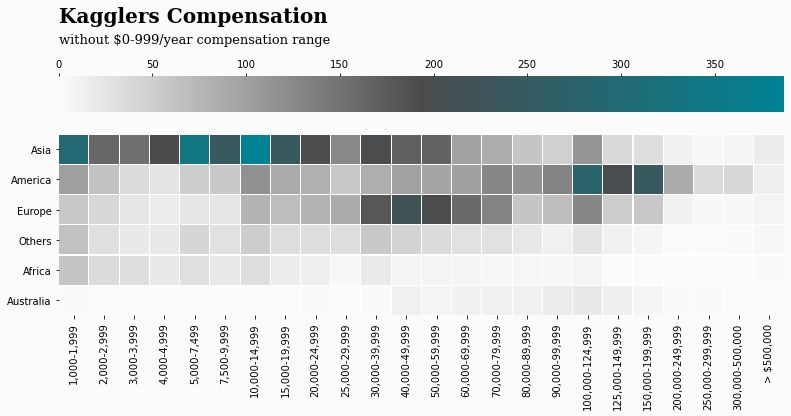

In [11]:
# Setting up figure and axes
fig = plt.figure(figsize=(13,10)) # create figure
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=-0.75)
ax0 = fig.add_subplot(gs[0, 0])

colors = ["#fbfbfb", "#4b4b4c","#008294"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=all_country_count_df.T, linewidths=.1, 
            square=True, cbar_kws = dict(use_gridspec=False,location="top"), cmap=colormap)

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

ax0.set_xlabel("")
   
ax0.text(0, -3.7, 'Kagglers Compensation', 
         fontsize=20, fontweight='bold', fontfamily='serif')

ax0.text(0, -3, 'without $0-999/year compensation range', 
         fontsize=13, fontweight='light', fontfamily='serif')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

<a id="kagglers-gender"></a>
[back to top](#table-of-contents)
### 3.4. Kagglers Gender
The interesting things are:

* Most of Kagglers are man and it is consistent across all continents.

In [12]:
continents_count_df = pd.DataFrame(survey2020_df["Q2"].value_counts())
continents_count_df = continents_count_df.reset_index(drop=False)
continents_count_df.columns = ["Gender","Count"]

asia_country_count_df = pd.DataFrame(survey2020_asia_df["Q2"].value_counts())
asia_country_count_df = asia_country_count_df.reset_index(drop=False)
asia_country_count_df.columns = ["Gender","Count"]

america_country_count_df = pd.DataFrame(survey2020_america_df["Q2"].value_counts())
america_country_count_df = america_country_count_df.reset_index(drop=False)
america_country_count_df.columns = ["Gender","Count"]

europe_country_count_df = pd.DataFrame(survey2020_europe_df["Q2"].value_counts())
europe_country_count_df = europe_country_count_df.reset_index(drop=False)
europe_country_count_df.columns = ["Gender","Count"]

others_country_count_df = pd.DataFrame(survey2020_others_df["Q2"].value_counts())
others_country_count_df = others_country_count_df.reset_index(drop=False)
others_country_count_df.columns = ["Gender","Count"]

africa_country_count_df = pd.DataFrame(survey2020_africa_df["Q2"].value_counts())
africa_country_count_df = africa_country_count_df.reset_index(drop=False)
africa_country_count_df.columns = ["Gender","Count"]

australia_country_count_df = pd.DataFrame(survey2020_australia_df["Q2"].value_counts())
australia_country_count_df = australia_country_count_df.reset_index(drop=False)
australia_country_count_df.columns = ["Gender","Count"]

Text(0, 1.2, 'Australia')

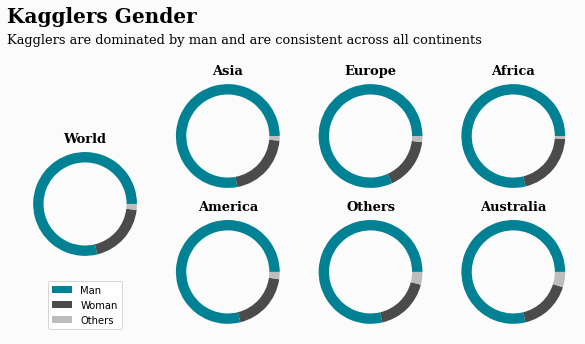

In [13]:
# Setting up figure and axes
fig = plt.figure(figsize=(10,5)) # create figure
gs = fig.add_gridspec(2, 4)
gs.update(wspace=0.1, hspace=0)
ax0 = fig.add_subplot(gs[0:2, 0])
ax1 = fig.add_subplot(gs[0, 1]) # create axes
ax2 = fig.add_subplot(gs[1, 1]) # create axes
ax3 = fig.add_subplot(gs[0, 2]) # create axes
ax4 = fig.add_subplot(gs[1, 2]) # create axes
ax5 = fig.add_subplot(gs[0, 3]) # create axes
ax6 = fig.add_subplot(gs[1, 3]) # create axes

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color
ax6.set_facecolor(background_color) # axes background color

color_map = ["#008294", "#4b4b4c", "#bdbdbd"]

# World
ax0.pie(x=continents_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))

ax0.text(-1.5, 3.5, 'Kagglers Gender', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-1.5, 3.1, 'Kagglers are dominated by man and are consistent across all continents', 
         fontsize=13, fontweight='light', fontfamily='serif')

ax0.text(0, 1.2, 'World', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='center')

ax0.legend(continents_count_df["Gender"], loc="lower center", bbox_to_anchor=(0.5, -0.5))

# Asia
ax1.pie(x=asia_country_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))
ax1.text(0, 1.2, 'Asia', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='center')

# America
ax2.pie(x=america_country_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))
ax2.text(0, 1.2, 'America', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='center')

# Europe
ax3.pie(x=europe_country_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))
ax3.text(0, 1.2, 'Europe', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='center')

# Others
ax4.pie(x=others_country_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))
ax4.text(0, 1.2, 'Others', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='center')

# Africa
ax5.pie(x=africa_country_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))
ax5.text(0, 1.2, 'Africa', fontsize=13, fontweight='bold', fontfamily='serif',horizontalalignment='center')

# Australia
ax6.pie(x=australia_country_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))
ax6.text(0, 1.2, 'Australia', fontsize=13, fontweight='bold', fontfamily='serif', horizontalalignment='center')

<a id="kagglers-education"></a>
[back to top](#table-of-contents)
### 3.4. Kagglers Education

The interesting things are:
* Most of Kagglers have Master degree followed by Bachelor degree. Master degree is the most education Kagglers had in every continents except for Asia and Africa. 
* While most of Asian and African Kagglers have a bachelor degree.

In [14]:
education_categorical_list = ["No formal education past high school",
                            "Some college/university study without earning a bachelor’s degree",
                            "Bachelor’s degree",
                            "Master’s degree",
                            "Doctoral degree",
                            "Professional degree",
                            "I prefer not to answer"]

continents_count_df = pd.DataFrame(survey2020_df["Q4"].value_counts())
continents_count_df = continents_count_df.reset_index(drop=False)
continents_count_df.columns = ["Education","Count"]
continents_count_df["Education"] = pd.Categorical(
    continents_count_df["Education"], education_categorical_list)
continents_count_df = continents_count_df.sort_values(by="Education")

asia_country_count_df = pd.DataFrame(survey2020_asia_df["Q4"].value_counts())
asia_country_count_df = asia_country_count_df.reset_index(drop=False)
asia_country_count_df.columns = ["Education","Count"]
asia_country_count_df["Education"] = pd.Categorical(
    asia_country_count_df["Education"], education_categorical_list)
asia_country_count_df = asia_country_count_df.sort_values(by="Education")

america_country_count_df = pd.DataFrame(survey2020_america_df["Q4"].value_counts())
america_country_count_df = america_country_count_df.reset_index(drop=False)
america_country_count_df.columns = ["Education","Count"]
america_country_count_df["Education"] = pd.Categorical(
    america_country_count_df["Education"], education_categorical_list)
america_country_count_df = america_country_count_df.sort_values(by="Education")

europe_country_count_df = pd.DataFrame(survey2020_europe_df["Q4"].value_counts())
europe_country_count_df = europe_country_count_df.reset_index(drop=False)
europe_country_count_df.columns = ["Education","Count"]
europe_country_count_df["Education"] = pd.Categorical(
    europe_country_count_df["Education"], education_categorical_list)
europe_country_count_df = europe_country_count_df.sort_values(by="Education")

others_country_count_df = pd.DataFrame(survey2020_others_df["Q4"].value_counts())
others_country_count_df = others_country_count_df.reset_index(drop=False)
others_country_count_df.columns = ["Education","Count"]
others_country_count_df["Education"] = pd.Categorical(
    others_country_count_df["Education"], education_categorical_list)
others_country_count_df = others_country_count_df.sort_values(by="Education")

africa_country_count_df = pd.DataFrame(survey2020_africa_df["Q4"].value_counts())
africa_country_count_df = africa_country_count_df.reset_index(drop=False)
africa_country_count_df.columns = ["Education","Count"]
africa_country_count_df["Education"] = pd.Categorical(
    africa_country_count_df["Education"], education_categorical_list)
africa_country_count_df = africa_country_count_df.sort_values(by="Education")

australia_country_count_df = pd.DataFrame(survey2020_australia_df["Q4"].value_counts())
australia_country_count_df = australia_country_count_df.reset_index(drop=False)
australia_country_count_df.columns = ["Education","Count"]
australia_country_count_df["Education"] = pd.Categorical(
    australia_country_count_df["Education"], education_categorical_list)
australia_country_count_df = australia_country_count_df.sort_values(by="Education")

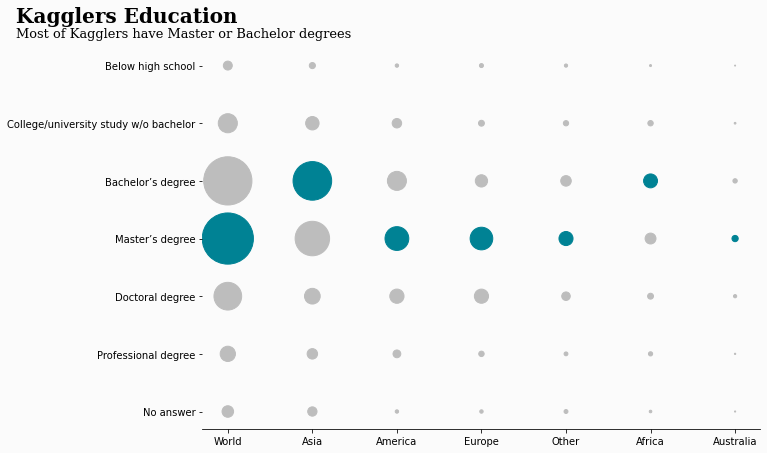

In [15]:
fig = plt.figure(figsize=(10,7)) # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.1, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

# World
color_map1 = ["#bdbdbd" for _ in range(7)]
color_map1[3] = "#008294"
color_map2 = ["#bdbdbd" for _ in range(7)]
color_map2[2] = "#008294"
color_map3 = ["#bdbdbd" for _ in range(7)]
color_map3[3] = "#008294"
color_map4 = ["#bdbdbd" for _ in range(7)]
color_map4[3] = "#008294"
color_map5 = ["#bdbdbd" for _ in range(7)]
color_map5[3] = "#008294"
color_map6 = ["#bdbdbd" for _ in range(7)]
color_map6[2] = "#008294"
color_map7 = ["#bdbdbd" for _ in range(7)]
color_map7[3] = "#008294"

x_dummy = np.arange(1, 7)
y_dummy = np.arange(1, 8)
ax0.scatter([1 for _ in range(7)], y_dummy, color=color_map1, s=continents_count_df["Count"]/3)
ax0.scatter([2 for _ in range(7)], y_dummy, color=color_map2, s=asia_country_count_df["Count"]/3)
ax0.scatter([3 for _ in range(7)], y_dummy, color=color_map3, s=america_country_count_df["Count"]/3)
ax0.scatter([4 for _ in range(7)], y_dummy, color=color_map4, s=europe_country_count_df["Count"]/3)
ax0.scatter([5 for _ in range(7)], y_dummy, color=color_map5, s=others_country_count_df["Count"]/3)
ax0.scatter([6 for _ in range(7)], y_dummy, color=color_map6, s=africa_country_count_df["Count"]/3)
ax0.scatter([7 for _ in range(7)], y_dummy, color=color_map7, s=australia_country_count_df["Count"]/3)

ax0.set_yticklabels(["", "Below high school", "College/university study w/o bachelor", "Bachelor’s degree",
                     "Master’s degree", "Doctoral degree", "Professional degree", "No answer"])
ax0.set_xticklabels(["", "World", "Asia", "America", "Europe", "Other", "Africa", "Australia"])
ax0.invert_yaxis()

ax0.text(-1.5, 0.25, 'Kagglers Education', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-1.5, 0.5, 'Most of Kagglers have Master or Bachelor degrees', fontsize=13, fontweight='light', fontfamily='serif')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)

<a id="kagglers-role"></a>
[back to top](#table-of-contents)
### 3.6. Kagglers Role
The interesting things are:
* Most of Kagglers are Students, meaning there is a growing interest from younger people to pursue data related job which is a good sign and Asia has the biggest student compared to other continents.
* Other than Asia and Africa, most of the role between Student and Data Scientist are quite balance as it can be seen in America, Europe, Australia and Others

In [16]:
continents_count_df = pd.DataFrame(survey2020_df["Q5"].value_counts())
continents_count_df = continents_count_df.reset_index(drop=False)
continents_count_df.columns = ["Role","Count"]

asia_country_count_df = pd.DataFrame(survey2020_asia_df["Q5"].value_counts())
asia_country_count_df = asia_country_count_df.reset_index(drop=False)
asia_country_count_df.columns = ["Role","Count"]

america_country_count_df = pd.DataFrame(survey2020_america_df["Q5"].value_counts())
america_country_count_df = america_country_count_df.reset_index(drop=False)
america_country_count_df.columns = ["Role","Count"]

europe_country_count_df = pd.DataFrame(survey2020_europe_df["Q5"].value_counts())
europe_country_count_df = europe_country_count_df.reset_index(drop=False)
europe_country_count_df.columns = ["Role","Count"]

others_country_count_df = pd.DataFrame(survey2020_others_df["Q5"].value_counts())
others_country_count_df = others_country_count_df.reset_index(drop=False)
others_country_count_df.columns = ["Role","Count"]

africa_country_count_df = pd.DataFrame(survey2020_africa_df["Q5"].value_counts())
africa_country_count_df = africa_country_count_df.reset_index(drop=False)
africa_country_count_df.columns = ["Role","Count"]

australia_country_count_df = pd.DataFrame(survey2020_australia_df["Q5"].value_counts())
australia_country_count_df = australia_country_count_df.reset_index(drop=False)
australia_country_count_df.columns = ["Role","Count"]

# Merging into 1 dataframe
continents_count_df = continents_count_df.set_index("Role")
asia_country_count_df = asia_country_count_df.set_index("Role")
america_country_count_df = america_country_count_df.set_index("Role")
europe_country_count_df = europe_country_count_df.set_index("Role")
others_country_count_df = others_country_count_df.set_index("Role")
africa_country_count_df = africa_country_count_df.set_index("Role")
australia_country_count_df = australia_country_count_df.set_index("Role")
all_country_count_df = pd.DataFrame()
all_country_count_df = pd.concat([
    asia_country_count_df, america_country_count_df,
    europe_country_count_df, others_country_count_df,
    africa_country_count_df, australia_country_count_df
    ], axis=1
)
all_country_count_df.columns = ["Asia", "America", "Europe", "Others", "Africa", "Australia"]
all_country_count_df = all_country_count_df.T

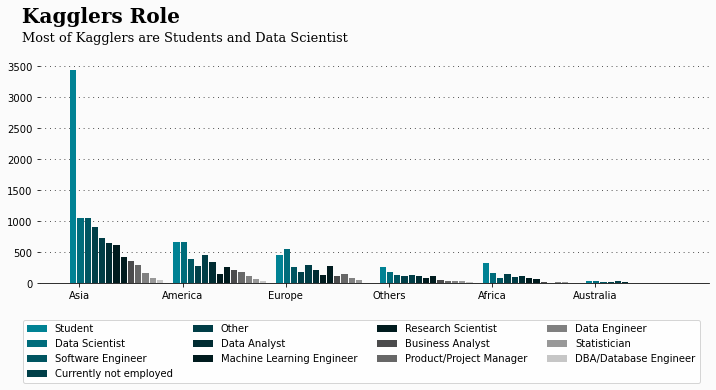

In [17]:
# Setting up figure and axes
fig = plt.figure(figsize=(12,4)) # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0], ylim=(0, 3500))

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

x = np.arange(len(all_country_count_df))
bar_width = 0.06

ax0.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(x, all_country_count_df["Student"], width=bar_width, color="#008294", label="Student", zorder=3)
ax0.bar(x+bar_width+0.01, all_country_count_df["Data Scientist"], width=bar_width, color="#006c7b", label="Data Scientist", zorder=3)
ax0.bar(x+bar_width*2+0.01*2, all_country_count_df["Software Engineer"], width=bar_width, color="#005561", label="Software Engineer", zorder=3)
ax0.bar(x+bar_width*3+0.01*3, all_country_count_df["Currently not employed"], width=bar_width, color="#003f48", label="Currently not employed", zorder=3)
ax0.bar(x+bar_width*4+0.01*4, all_country_count_df["Other"], width=bar_width, color="#003d46", label="Other", zorder=3)
ax0.bar(x+bar_width*5+0.01*5, all_country_count_df["Data Analyst"], width=bar_width, color="#002c32", label="Data Analyst", zorder=3)
ax0.bar(x+bar_width*6+0.01*6, all_country_count_df["Machine Learning Engineer"], width=bar_width, color="#001b1e", label="Machine Learning Engineer", zorder=3)
ax0.bar(x+bar_width*7+0.01*7, all_country_count_df["Research Scientist"], width=bar_width, color="#001b1e", label="Research Scientist", zorder=3)
ax0.bar(x+bar_width*8+0.01*8, all_country_count_df["Business Analyst"], width=bar_width, color="#4b4b4c", label="Business Analyst", zorder=3)
ax0.bar(x+bar_width*9+0.01*9, all_country_count_df["Product/Project Manager"], width=bar_width, color="#676767", label="Product/Project Manager", zorder=3)
ax0.bar(x+bar_width*10+0.01*10, all_country_count_df["Data Engineer"], width=bar_width, color="#808080", label="Data Engineer", zorder=3)
ax0.bar(x+bar_width*11+0.01*11, all_country_count_df["Statistician"], width=bar_width, color="#989898", label="Statistician", zorder=3)
ax0.bar(x+bar_width*12+0.01*12, all_country_count_df["DBA/Database Engineer"], width=bar_width, color="#c6c6c6", label="DBA/Database Engineer", zorder=3)

# Fix the x-axes.
ax0.set_xticks(x + bar_width)
x_labels = list(all_country_count_df.index)
ax0.set_xticklabels(x_labels)

ax0.text(-0.5, 4200, 'Kagglers Role', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-0.5, 3900, 'Most of Kagglers are Students and Data Scientist', fontsize=13, fontweight='light', fontfamily='serif')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    
ax0.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.48, -0.48))


<a id="programming-machine-learning"></a>
[back to top](#table-of-contents)
## 4. Programming & Machine Learning
In this section, we are trying to see more information on programming and machine learning that Kaggler used in their regular basis based on their continents.

<a id="kagglers-programming-experiences"></a>
[back to top](#table-of-contents)
### 4.1. Kagglers Programming Experience
The interesting things are:
* There is no Kaggler that has experience between 2-3 years which is quite strange. It may be due to error when the survey conducted. 
* Most of Asian and African Kagglers have experience between 1-2 years and Kagglers with 20+ years experience are very small.
* On the other hand American, European and African Kagglers have experience between 3-5 years. 
* Australia are dominated with Kagglers that have experience between 5-10 years, more experience Kagglers are more interested to join Kaggle.

In [18]:
experience_df = pd.DataFrame(survey2020_df.groupby(["Continents", "Q6"])["Continents"].count())
experience_df.columns = ["Count"]
experience_df = experience_df.reset_index(drop=False)

year_lst = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
experience_df["Q6"] = pd.Categorical(
    experience_df["Q6"], year_lst)
experience_df = experience_df.sort_values(by=["Continents", "Q6"])

asia_country_count_df = experience_df[experience_df["Continents"]=="Asia"]
asia_country_count_df["Asia"] = asia_country_count_df["Count"].apply(lambda x: (x/sum(asia_country_count_df["Count"])*100))
asia_country_count_df.index = asia_country_count_df["Q6"]
asia_country_count_df = asia_country_count_df.drop(["Q6", "Count", "Continents"], axis=1)
asia_country_count_df = asia_country_count_df.T

america_country_count_df = experience_df[experience_df["Continents"]=="America"]
america_country_count_df["America"] = america_country_count_df["Count"].apply(lambda x: (x/sum(america_country_count_df["Count"])*100))
america_country_count_df.index = america_country_count_df["Q6"]
america_country_count_df = america_country_count_df.drop(["Q6", "Count", "Continents"], axis=1)
america_country_count_df = america_country_count_df.T

europe_country_count_df = experience_df[experience_df["Continents"]=="Europe"]
europe_country_count_df["Europe"] = europe_country_count_df["Count"].apply(lambda x: (x/sum(europe_country_count_df["Count"])*100))
europe_country_count_df.index = europe_country_count_df["Q6"]
europe_country_count_df = europe_country_count_df.drop(["Q6", "Count", "Continents"], axis=1)
europe_country_count_df = europe_country_count_df.T

others_country_count_df = experience_df[experience_df["Continents"]=="Others"]
others_country_count_df["Others"] = others_country_count_df["Count"].apply(lambda x: (x/sum(others_country_count_df["Count"])*100))
others_country_count_df.index = others_country_count_df["Q6"]
others_country_count_df = others_country_count_df.drop(["Q6", "Count", "Continents"], axis=1)
others_country_count_df = others_country_count_df.T

africa_country_count_df = experience_df[experience_df["Continents"]=="Africa"]
africa_country_count_df["Africa"] = africa_country_count_df["Count"].apply(lambda x: (x/sum(africa_country_count_df["Count"])*100))
africa_country_count_df.index = africa_country_count_df["Q6"]
africa_country_count_df = africa_country_count_df.drop(["Q6", "Count", "Continents"], axis=1)
africa_country_count_df = africa_country_count_df.T

australia_country_count_df = experience_df[experience_df["Continents"]=="Australia"]
australia_country_count_df["Australia"] = australia_country_count_df["Count"].apply(lambda x: (x/sum(australia_country_count_df["Count"])*100))
australia_country_count_df.index = australia_country_count_df["Q6"]
australia_country_count_df = australia_country_count_df.drop(["Q6", "Count", "Continents"], axis=1)
australia_country_count_df = australia_country_count_df.T

experience_merge_df = pd.DataFrame()
experience_merge_df = pd.concat([asia_country_count_df, america_country_count_df, europe_country_count_df,
                                others_country_count_df, africa_country_count_df, australia_country_count_df], axis=0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Text(-0.5, -0.75, 'Most of Kagglers have experience between 1-2 years and 3-5 years')

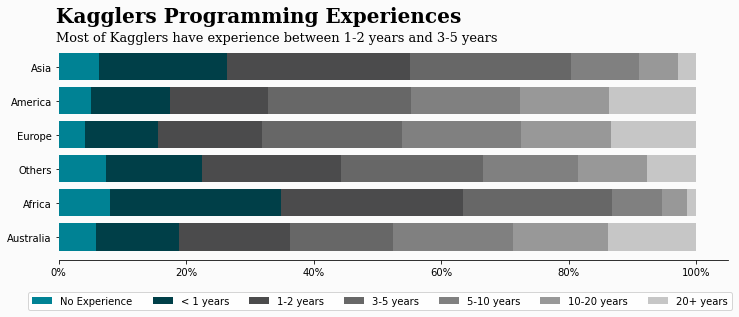

In [19]:
# Setting up figure and axes
fig = plt.figure(figsize=(12,4)) # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

ax0.barh(experience_merge_df.index, experience_merge_df['I have never written code'],
       color="#008294", zorder=3, label="No Experience"
)

ax0.barh(experience_merge_df.index, experience_merge_df['< 1 years'], 
       left=experience_merge_df['I have never written code'],
       color="#003f48", zorder=3, label="< 1 years"
)

ax0.barh(experience_merge_df.index, experience_merge_df['1-2 years'], 
       left=experience_merge_df['I have never written code']+experience_merge_df['< 1 years'],
       color="#4b4b4c", zorder=3, label="1-2 years"
)

ax0.barh(experience_merge_df.index, experience_merge_df['3-5 years'], 
       left=experience_merge_df['I have never written code']+experience_merge_df['< 1 years']+experience_merge_df['1-2 years'],
       color="#676767", zorder=3, label="3-5 years"
)

ax0.barh(experience_merge_df.index, experience_merge_df['5-10 years'], 
       left=experience_merge_df['I have never written code']+experience_merge_df['< 1 years']+experience_merge_df['1-2 years']+experience_merge_df['3-5 years'],
       color="#808080", zorder=3, label="5-10 years"
)

ax0.barh(experience_merge_df.index, experience_merge_df['10-20 years'], 
       left=experience_merge_df['I have never written code']+experience_merge_df['< 1 years']+experience_merge_df['1-2 years']+experience_merge_df['3-5 years']+experience_merge_df['5-10 years'],
       color="#989898", zorder=3, label="10-20 years"
)

ax0.barh(experience_merge_df.index, experience_merge_df['20+ years'], 
       left=experience_merge_df['I have never written code']+experience_merge_df['< 1 years']+experience_merge_df['1-2 years']+experience_merge_df['3-5 years']+experience_merge_df['5-10 years']+experience_merge_df['10-20 years'],
       color="#c6c6c6", zorder=3, label="20+ years"
)

ax0.invert_yaxis()
ax0.xaxis.set_major_formatter(mtick.PercentFormatter())    
ax0.legend(loc='lower center', ncol=7, bbox_to_anchor=(0.48, -0.25))

# Remove top, right and left line 
for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    
ax0.text(-0.5, -1.3, 'Kagglers Programming Experiences', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-0.5, -0.75, 'Most of Kagglers have experience between 1-2 years and 3-5 years', fontsize=13, fontweight='light', 
         fontfamily='serif')

<a id="kagglers-machine-learning-programming-experience"></a>
[back to top](#table-of-contents)
### 4.2. Kagglers Machine Learning & Programming Experience 

The interesting things are:
*  There is a growing interest of machine learning in the world as can be seen by Kaggler that have experience in programming 5 years and below have done machine learning. 
* Many Kagglers have an experience of programming and machine learning below 1 years and 1-2 years which mean that many Kagglers do programming specifically for machine learning.
* Many Kaggler in America, Europe, Others and Australia that have more experience in programming but less in machine learning. This can be interpreted that machine learning still has an interst for more experience programmer but its hardly seen in Asia and Africa, though it's still happening.

In [20]:
exp_year_lst = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
ml_year_lst = ['I do not use machine learning methods', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years',
               '5-10 years', '10-20 years', '20 or more years']
continents_count_df = survey2020_df[["Continents", "Q6", "Q15"]]
continents_count_df["Q6"] = pd.Categorical(continents_count_df["Q6"], exp_year_lst)
continents_count_df["Q15"] = pd.Categorical(continents_count_df["Q15"], ml_year_lst)
continents_count_df.columns = ["Continents", "Programming Exp", "Machine Learning Exp"]

continents_count_cross_df = pd.crosstab(continents_count_df["Programming Exp"], continents_count_df["Machine Learning Exp"])

asia_country_count_df = continents_count_df[continents_count_df["Continents"]=="Asia"]
asia_country_count_cross_df = pd.crosstab(asia_country_count_df["Programming Exp"], asia_country_count_df["Machine Learning Exp"])

america_country_count_df = continents_count_df[continents_count_df["Continents"]=="America"]
america_country_count_cross_df = pd.crosstab(america_country_count_df["Programming Exp"], america_country_count_df["Machine Learning Exp"])

europe_country_count_df = continents_count_df[continents_count_df["Continents"]=="Europe"]
europe_country_count_cross_df = pd.crosstab(europe_country_count_df["Programming Exp"], europe_country_count_df["Machine Learning Exp"])

others_country_count_df = continents_count_df[continents_count_df["Continents"]=="Others"]
others_country_count_cross_df = pd.crosstab(others_country_count_df["Programming Exp"], others_country_count_df["Machine Learning Exp"])

africa_country_count_df = continents_count_df[continents_count_df["Continents"]=="Africa"]
africa_country_count_cross_df = pd.crosstab(africa_country_count_df["Programming Exp"], africa_country_count_df["Machine Learning Exp"])

australia_country_count_df = continents_count_df[continents_count_df["Continents"]=="Australia"]
australia_country_count_cross_df = pd.crosstab(australia_country_count_df["Programming Exp"], australia_country_count_df["Machine Learning Exp"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(704.8235294117648, 0.5, '')

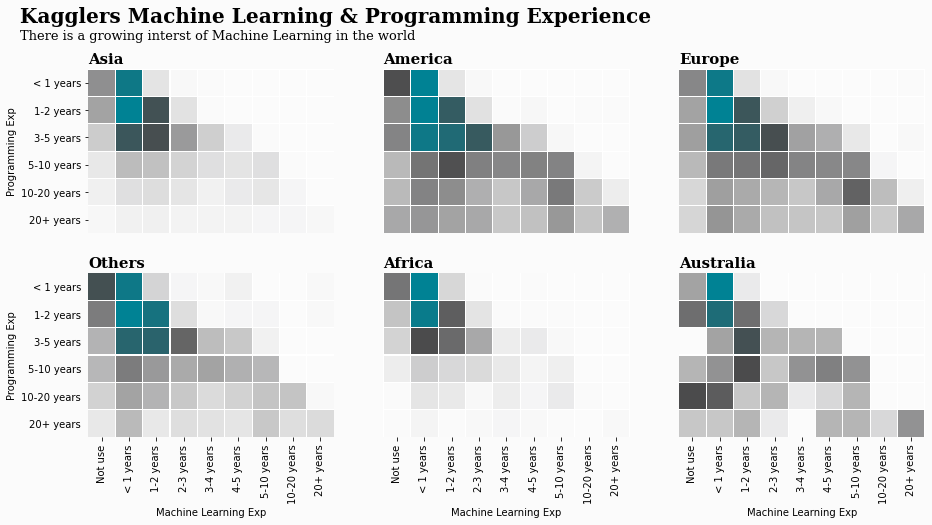

In [21]:
# Setting up figure and axes
fig = plt.figure(figsize=(15,10)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=-0.4)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color

colors = ["#fbfbfb", "#4b4b4c","#008294"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=asia_country_count_cross_df, linewidths=.1, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap)
sns.heatmap(ax=ax1, data=america_country_count_cross_df, linewidths=.1, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap)
sns.heatmap(ax=ax2, data=europe_country_count_cross_df, linewidths=.1, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap)
sns.heatmap(ax=ax3, data=others_country_count_cross_df, linewidths=.1, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap)
sns.heatmap(ax=ax4, data=africa_country_count_cross_df, linewidths=.1, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap)
sns.heatmap(ax=ax5, data=australia_country_count_cross_df, linewidths=.1, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap)

ax0.text(-2.5, -1.7, 
         'Kagglers Machine Learning & Programming Experience', 
         fontsize=20, fontweight='bold', fontfamily='serif')

ax0.text(-2.5, -1.1, 
         'There is a growing interst of Machine Learning in the world', 
         fontsize=13, fontweight='light', fontfamily='serif')

ax0.text(0, -0.2, 'Asia', fontsize=15, fontweight='bold', fontfamily='serif')
ax1.text(0, -0.2, 'America', fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(0, -0.2, 'Europe', fontsize=15, fontweight='bold', fontfamily='serif')
ax3.text(0, -0.2, 'Others', fontsize=15, fontweight='bold', fontfamily='serif')
ax4.text(0, -0.2, 'Africa', fontsize=15, fontweight='bold', fontfamily='serif')
ax5.text(0, -0.2, 'Australia', fontsize=15, fontweight='bold', fontfamily='serif')

ax0.set_xticklabels("")
ax0.tick_params(bottom=False)
ax1.set_xticklabels("")
ax1.set_yticklabels("")
ax1.tick_params(left=False)
ax1.tick_params(bottom=False)
ax2.set_xticklabels("")
ax2.set_yticklabels("")
ax2.tick_params(left=False)
ax2.tick_params(bottom=False)
ax3.set_xticklabels(["Not use", "< 1 years", "1-2 years", "2-3 years", "3-4 years", "4-5 years", "5-10 years", "10-20 years", "20+ years"])
ax3.tick_params(left=False)
ax4.set_xticklabels("")
ax4.set_yticklabels("")
ax4.tick_params(left=False)
ax4.set_yticklabels("")
ax4.tick_params(left=False)
ax4.set_xticklabels(["Not use", "< 1 years", "1-2 years", "2-3 years", "3-4 years", "4-5 years", "5-10 years", "10-20 years", "20+ years"])
ax5.set_yticklabels("")
ax5.tick_params(left=False)
ax5.set_xticklabels(["Not use", "< 1 years", "1-2 years", "2-3 years", "3-4 years", "4-5 years", "5-10 years", "10-20 years", "20+ years"])

ax0.set_xlabel("")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax4.set_ylabel("")
ax5.set_ylabel("")

<a id="kagglers-ide"></a>
[back to top](#table-of-contents)
### 4.3. Kagglers IDE 

The interesting things are:
* Jupyter is the most used IDE for Kagglers around the world.
* Though VSCode is the 2nd most used IDE in the world, it still has a very big gap compared to Jupyter.
* The third place is varies among the continents with most of Kagglers choose PyCharm except for America and Australia which prefer RStudio compared to PyCharm.
* R is ranked as the 3rd highest languange in all continents (except in Asia), but RStudio is not as popular as R itself in Europe, Others and Africa. Pycharm is still dominating in those three continents.  

In [22]:
ide_lst = ["Q9_Part_1", "Q9_Part_2", "Q9_Part_3", "Q9_Part_4", "Q9_Part_5", "Q9_Part_6",
           "Q9_Part_7", "Q9_Part_8", "Q9_Part_9", "Q9_Part_10", "Q9_Part_11", "Q9_OTHER"] 
ide_df = survey2020_df.groupby(["Continents"])[ide_lst].count()
ide_df.columns = ["Jupyter", "RStudio", "Visual Studio", "VSCode", "PyCharm", "Spyder", "Notebook++", 
                  "Sublime Text", "Vim, Emacs", "MATLAB", "None", "Other"]
ide_df = ide_df.loc[["Asia", "America", "Europe", "Others", "Africa", "Australia"], :]
ide_df = ide_df.T

asia_country_count_df = pd.DataFrame(ide_df["Asia"]).sort_values(by="Asia", ascending=True)
america_country_count_df = pd.DataFrame(ide_df["America"]).sort_values(by="America", ascending=True)
europe_country_count_df = pd.DataFrame(ide_df["Europe"]).sort_values(by="Europe", ascending=True)
others_country_count_df = pd.DataFrame(ide_df["Others"]).sort_values(by="Others", ascending=True)
africa_country_count_df = pd.DataFrame(ide_df["Africa"]).sort_values(by="Africa", ascending=True)
australia_country_count_df = pd.DataFrame(ide_df["Australia"]).sort_values(by="Australia", ascending=True)

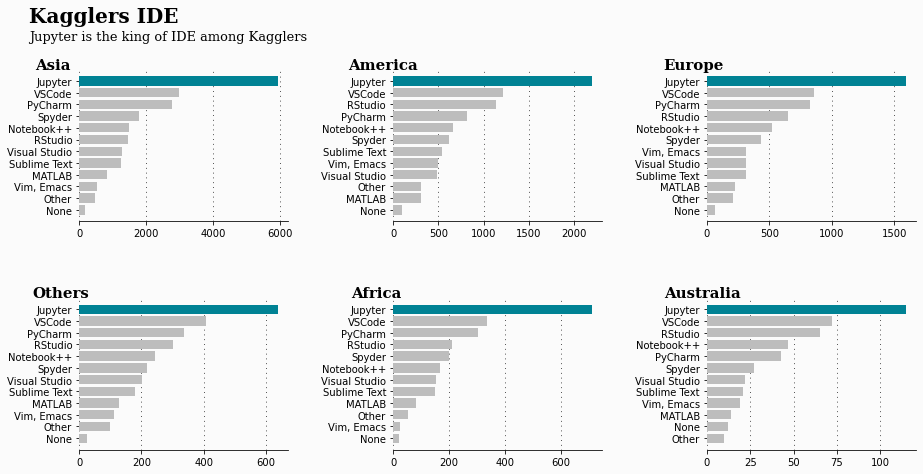

In [23]:
# Setting up figure and axes
fig = plt.figure(figsize=(15,7)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1]) # create axes
ax2 = fig.add_subplot(gs[0, 2]) # create axes
ax3 = fig.add_subplot(gs[1, 0]) # create axes
ax4 = fig.add_subplot(gs[1, 1]) # create axes
ax5 = fig.add_subplot(gs[1, 2]) # create axes

color_map = ["#bdbdbd" for _ in range(13)]
color_map[11] = "#008294"

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color

ax0.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax1.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax2.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax3.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax4.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax5.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))

ax0.barh(asia_country_count_df.index, asia_country_count_df["Asia"], color=color_map, zorder=3)
ax1.barh(america_country_count_df.index, america_country_count_df["America"], color=color_map, zorder=3)
ax2.barh(europe_country_count_df.index, europe_country_count_df["Europe"], color=color_map, zorder=3)
ax3.barh(others_country_count_df.index, others_country_count_df["Others"], color=color_map, zorder=3)
ax4.barh(africa_country_count_df.index, africa_country_count_df["Africa"], color=color_map, zorder=3)
ax5.barh(australia_country_count_df.index, australia_country_count_df["Australia"], color=color_map, zorder=3)

ax0.text(-1500, 16, 'Kagglers IDE', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-1500, 14.5, 'Jupyter is the king of IDE among Kagglers', fontsize=13, fontweight='light', fontfamily='serif')
ax0.text(-1300, 12, 'Asia', fontsize=15, fontweight='bold', fontfamily='serif')
ax1.text(-500, 12, 'America', fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(-350, 12, 'Europe', fontsize=15, fontweight='bold', fontfamily='serif')
ax3.text(-150, 12, 'Others', fontsize=15, fontweight='bold', fontfamily='serif')
ax4.text(-150, 12, 'Africa', fontsize=15, fontweight='bold', fontfamily='serif')
ax5.text(-25, 12, 'Australia', fontsize=15, fontweight='bold', fontfamily='serif')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)

<a id="kagglers-programming-languages"></a>
[back to top](#table-of-contents)
### 4.4. Kagglers Programming Languages 
The interesting things are:
* Python is the clear winners in here, Python is the most popular programming languanges amount Kagglers in every continents.
* The second most popular programming languanges that Kagglers use is SQL.
* R is not popular among Kaggler in Asia as it is ranked 6, which very different from the rest of the world which put R as no 3 programming languanges.
* C and C++ are also still popular in Asia compared to other continents. 

In [24]:
languange_lst = ["Q7_Part_1", "Q7_Part_2", "Q7_Part_3", "Q7_Part_4", "Q7_Part_5", "Q7_Part_6",
                "Q7_Part_7", "Q7_Part_8", "Q7_Part_9", "Q7_Part_10", "Q7_Part_11", "Q7_Part_12", "Q7_OTHER"] 
languange_df = survey2020_df.groupby(["Continents"])[languange_lst].count()
languange_df.columns = ["Python", "R", "SQL", "C", "C++", "Java", "Javascript", "Julia", "Swift", "Bash", "MATLAB", "None", "Other"]
languange_df = languange_df.loc[["Asia", "America", "Europe", "Others", "Africa", "Australia"], :]
languange_df = languange_df.T

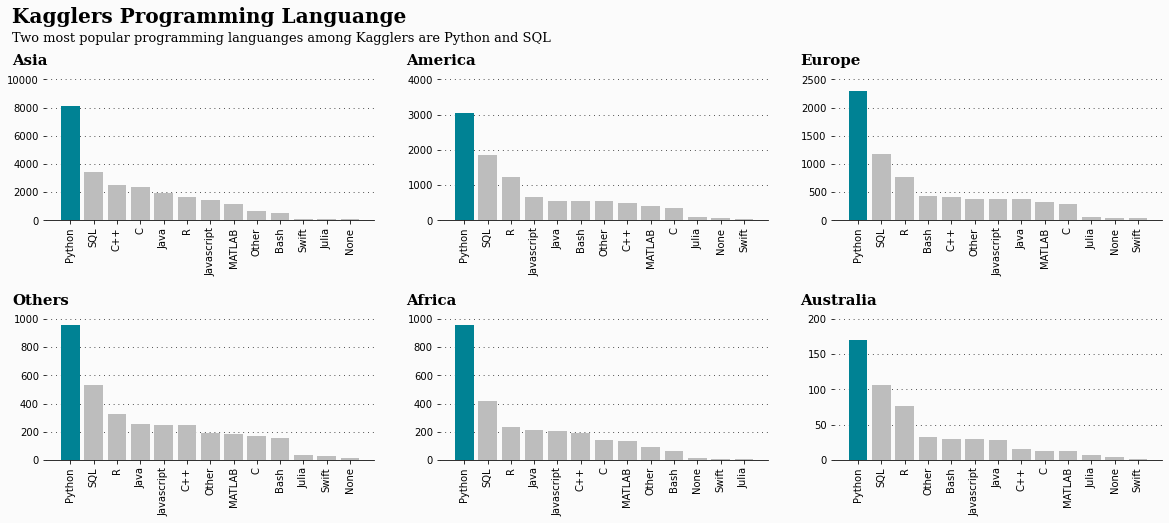

In [25]:
# Setting up figure and axes
fig = plt.figure(figsize=(20,7)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.7)
ax0 = fig.add_subplot(gs[0, 0], ylim=(0, 10000))
ax1 = fig.add_subplot(gs[0, 1], ylim=(0, 4000)) # create axes
ax2 = fig.add_subplot(gs[0, 2], ylim=(0, 2500)) # create axes
ax3 = fig.add_subplot(gs[1, 0], ylim=(0, 1000)) # create axes
ax4 = fig.add_subplot(gs[1, 1], ylim=(0, 1000)) # create axes
ax5 = fig.add_subplot(gs[1, 2], ylim=(0, 200)) # create axes

color_map = ["#bdbdbd" for _ in range(13)]
color_map[0] = "#008294"

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color

ax0.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax4.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

languange_df = languange_df.sort_values(by="Asia", ascending=False)
ax0.bar(languange_df.index, height=languange_df['Asia'], color=color_map, zorder=3)
ax0.set_xticklabels(languange_df.index, rotation=90)
languange_df = languange_df.sort_values(by="America", ascending=False)
ax1.bar(languange_df.index, height=languange_df['America'], color=color_map, zorder=3)
ax1.set_xticklabels(languange_df.index, rotation=90)
languange_df = languange_df.sort_values(by="Europe", ascending=False)
ax2.bar(languange_df.index, height=languange_df['Europe'], color=color_map, zorder=3)
ax2.set_xticklabels(languange_df.index, rotation=90)
languange_df = languange_df.sort_values(by="Others", ascending=False)
ax3.bar(languange_df.index, height=languange_df['Others'], color=color_map, zorder=3)
ax3.set_xticklabels(languange_df.index, rotation=90)
languange_df = languange_df.sort_values(by="Africa", ascending=False)
ax4.bar(languange_df.index, height=languange_df['Africa'], color=color_map, zorder=3)
ax4.set_xticklabels(languange_df.index, rotation=90)
languange_df = languange_df.sort_values(by="Australia", ascending=False)
ax5.bar(languange_df.index, height=languange_df['Australia'], color=color_map, zorder=3)
ax5.set_xticklabels(languange_df.index, rotation=90)

ax0.text(-2.5, 14000, 
         'Kagglers Programming Languange', 
         fontsize=20, fontweight='bold', fontfamily='serif')

ax0.text(-2.5, 12700, 
         'Two most popular programming languanges among Kagglers are Python and SQL', 
         fontsize=13, fontweight='light', fontfamily='serif')

ax0.text(-2.5, 11000, 
         'Asia', 
         fontsize=15, fontweight='bold', fontfamily='serif')

ax1.text(-2.5, 4400, 
         'America', 
         fontsize=15, fontweight='bold', fontfamily='serif')

ax2.text(-2.5, 2750, 
         'Europe', 
         fontsize=15, fontweight='bold', fontfamily='serif')

ax3.text(-2.5, 1100, 
         'Others', 
         fontsize=15, fontweight='bold', fontfamily='serif')

ax4.text(-2.5, 1100, 
         'Africa', 
         fontsize=15, fontweight='bold', fontfamily='serif')

ax5.text(-2.5, 220, 
         'Australia', 
         fontsize=15, fontweight='bold', fontfamily='serif')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)

<a id="kagglers-machine-learning-algorithm"></a>
[back to top](#table-of-contents)
### 4.5. Kagglers Machine Learning Algorithm 

The interesting things are:
* The first two algorithm that are regularly used by Kaggler around the world are the same. They are Linear/Logistic Regression and Decision Trees/Random Forests.
* Asian, Others, African and Australian Kagglers ranked Convolutional Neural Networks as their 3rd regularly used algorithm and ranked Gradient Boosting Machines in the 4th position. This is reversed from America and Europe continents which ranked Gradient Boosting Machines in the 3rd position.
* Fifth position can be separated into 3 classification: (a) Recurrent Neural Networks are popular in Asia and Others continents, (b) Bayesian Approaches is more popular in America, Africa and Australia and (c) Dense Neural Networks is popular among Kagglers in Europe.

In [26]:
ml_algo_lst = ["Q17_Part_1", "Q17_Part_2", "Q17_Part_3", "Q17_Part_4", "Q17_Part_5", "Q17_Part_6",
               "Q17_Part_7", "Q17_Part_8", "Q17_Part_9", "Q17_Part_10", "Q17_Part_11", "Q17_OTHER"] 
ml_algo_df = survey2020_df.groupby(["Continents"])[ml_algo_lst].count()
ml_algo_df.columns = ["Linear/Logistic\nRegression", "Decision Trees/\nRandom Forests", "Gradient\nBoosting\nMachines", 
                      "Bayesian\nApproaches", "Evolutionary\nApproaches", "Dense\nNeural\nNetworks",
                      "Convolutional\nNeural\nNetworks", "Generative\nAdversarial\nNetworks", "Recurrent\nNeural\nNetworks",
                      "Transformer\nNetworks", "None", "Other"]     
ml_algo_df = ml_algo_df.loc[["Asia", "America", "Europe", "Others", "Africa", "Australia"], :]
ml_algo_df = ml_algo_df.T

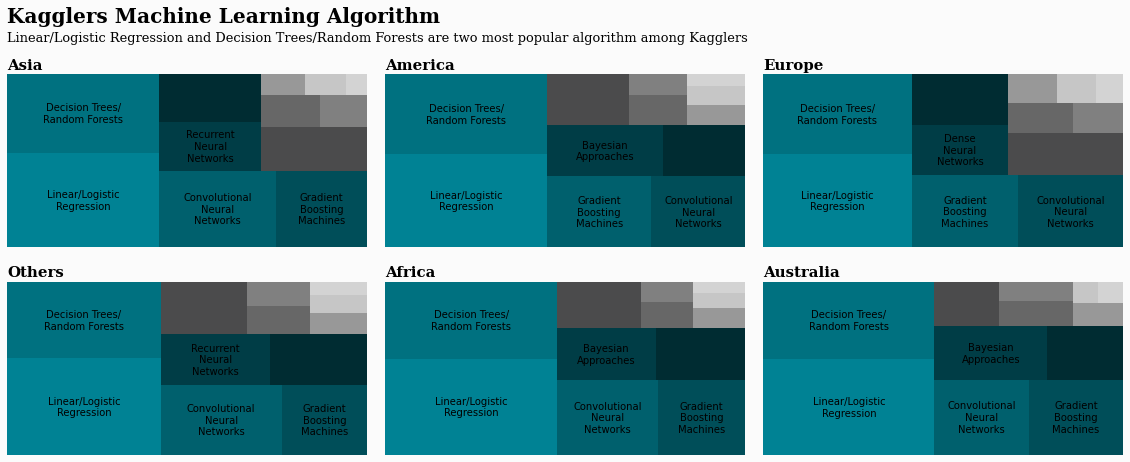

In [27]:
# Setting up figure and axes
fig = plt.figure(figsize=(20,7)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.05, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1]) # create axes
ax2 = fig.add_subplot(gs[0, 2]) # create axes
ax3 = fig.add_subplot(gs[1, 0]) # create axes
ax4 = fig.add_subplot(gs[1, 1]) # create axes
ax5 = fig.add_subplot(gs[1, 2]) # create axes

color_map = ["#008294", "#007180", "#00606d", "#004e59", "#003d46", "#002c32", "#4b4b4c", "#676767",
             "#808080", "#989898", "#c6c6c6", "#d3d3d3"]

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color

ax0.set_yticklabels([])
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])

ax0.set_xticklabels([])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])
ax5.set_xticklabels([])

ax0.tick_params(left=False, bottom=False)
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(left=False, bottom=False)
ax3.tick_params(left=False, bottom=False)
ax4.tick_params(left=False, bottom=False)
ax5.tick_params(left=False, bottom=False)

ml_algo_df = ml_algo_df.sort_values(by="Asia", ascending=False)
squarify.plot(sizes=ml_algo_df['Asia'], label=ml_algo_df.index[:5], color=color_map, ax=ax0)
ml_algo_df = ml_algo_df.sort_values(by="America", ascending=False)
squarify.plot(sizes=ml_algo_df['America'], label=ml_algo_df.index[:5], color=color_map, ax=ax1)
ml_algo_df = ml_algo_df.sort_values(by="Europe", ascending=False)
squarify.plot(sizes=ml_algo_df['Europe'], label=ml_algo_df.index[:5], color=color_map, ax=ax2)
ml_algo_df = ml_algo_df.sort_values(by="Others", ascending=False)
squarify.plot(sizes=ml_algo_df['Others'], label=ml_algo_df.index[:5], color=color_map, ax=ax3)
ml_algo_df = ml_algo_df.sort_values(by="Africa", ascending=False)
squarify.plot(sizes=ml_algo_df['Africa'], label=ml_algo_df.index[:5], color=color_map, ax=ax4)
ml_algo_df = ml_algo_df.sort_values(by="Australia", ascending=False)
squarify.plot(sizes=ml_algo_df['Australia'], label=ml_algo_df.index[:5], color=color_map, ax=ax5)

ax0.text(0, 130, 
         'Kagglers Machine Learning Algorithm', 
         fontsize=20, fontweight='bold', fontfamily='serif')

ax0.text(0, 119, 
         'Linear/Logistic Regression and Decision Trees/Random Forests are two most popular algorithm among Kagglers', 
         fontsize=13, fontweight='light', fontfamily='serif')

ax0.text(0, 103, 
         'Asia', 
         fontsize=15, fontweight='bold', fontfamily='serif')

ax1.text(0, 103, 
         'America', 
         fontsize=15, fontweight='bold', fontfamily='serif')

ax2.text(0, 103, 
         'Europe', 
         fontsize=15, fontweight='bold', fontfamily='serif')

ax3.text(0, 103, 
         'Others', 
         fontsize=15, fontweight='bold', fontfamily='serif')

ax4.text(0, 103, 
         'Africa', 
         fontsize=15, fontweight='bold', fontfamily='serif')

ax5.text(0, 103, 
         'Australia', 
         fontsize=15, fontweight='bold', fontfamily='serif')

for s in ["top","right","left", "bottom"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

<a id="kagglers-machine-learning-framework"></a>
[back to top](#table-of-contents)
### 4.6. Kagglers Machine Learning Framework 

The interesting things are:
* Kagglers around the world agree the popularity rank for Scikit-Learn, TensorFlow and Keras which are in order of 1 to 3 respectively. 
* The differences between TensorFlow and Keras are not far away among Kagglers as Keras is the high level API for TensorFlow. Kagglers that use Keras is also using TensorFlow but Kagglers that use TensorFlow may not using Keras, this situation also explain why TensorFlow is more popular than Keras. 
* Xgboost is more popular in Africa and Australia compared to PyTorch while the rest of world prefers PyTorch.

In [28]:
ml_fm_lst = ["Q16_Part_1", "Q16_Part_2", "Q16_Part_3", "Q16_Part_4", "Q16_Part_5", "Q16_Part_6", "Q16_Part_7", "Q16_Part_8", 
             "Q16_Part_9", "Q16_Part_10", "Q16_Part_11", "Q16_Part_12", "Q16_Part_13", "Q16_Part_14", "Q16_Part_15", "Q16_OTHER"] 
ml_fm_df = survey2020_df.groupby(["Continents"])[ml_fm_lst].count()
ml_fm_df.columns = ["Scikit-learn", "TensorFlow", "Keras", "PyTorch", "Fast.ai", "MXNet", "Xgboost", "LightGBM", "CatBoost",
                    "Prophet", "H2O 3", "Caret", "Tidymodels", "JAX", "None", "Other"]
ml_fm_df = ml_fm_df.loc[["Asia", "America", "Europe", "Others", "Africa", "Australia"], :]
ml_fm_df = ml_fm_df.T.sort_values(by="Asia")

ml_fm_df["Asia_Percentage"] = ml_fm_df["Asia"].apply(lambda x: (x/sum(ml_fm_df["Asia"])*100))
ml_fm_df["America_Percentage"] = ml_fm_df["America"].apply(lambda x: (x/sum(ml_fm_df["America"])*100))
ml_fm_df["Europe_Percentage"] = ml_fm_df["Europe"].apply(lambda x: (x/sum(ml_fm_df["Europe"])*100))
ml_fm_df["Others_Percentage"] = ml_fm_df["Others"].apply(lambda x: (x/sum(ml_fm_df["Others"])*100))
ml_fm_df["Africa_Percentage"] = ml_fm_df["Africa"].apply(lambda x: (x/sum(ml_fm_df["Africa"])*100))
ml_fm_df["Australia_Percentage"] = ml_fm_df["Australia"].apply(lambda x: (x/sum(ml_fm_df["Australia"])*100))

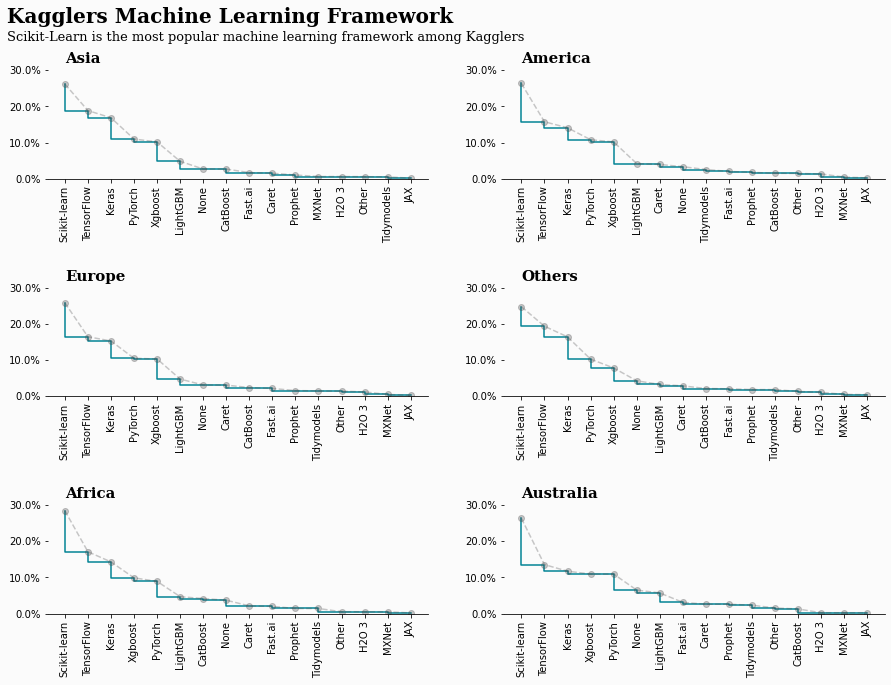

In [29]:
# Setting up figure and axes
fig = plt.figure(figsize=(15,10)) # create figure
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.2, hspace=1)
ax0 = fig.add_subplot(gs[0, 0], ylim=(0, 30))
ax1 = fig.add_subplot(gs[0, 1], ylim=(0, 30))
ax2 = fig.add_subplot(gs[1, 0], ylim=(0, 30))
ax3 = fig.add_subplot(gs[1, 1], ylim=(0, 30))
ax4 = fig.add_subplot(gs[2, 0], ylim=(0, 30))
ax5 = fig.add_subplot(gs[2, 1], ylim=(0, 30))

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color

ml_fm_df = ml_fm_df.sort_values(by="Asia_Percentage", ascending=False)
ax0.step(ml_fm_df.index, ml_fm_df["Asia_Percentage"], color="#008294")
ax0.plot(ml_fm_df.index, ml_fm_df["Asia_Percentage"], 'o--', color="#4b4b4c", alpha=0.3)
ax0.set_xticklabels(ml_fm_df.index, rotation=90)

ml_fm_df = ml_fm_df.sort_values(by="America_Percentage", ascending=False)
ax1.step(ml_fm_df.index, ml_fm_df["America_Percentage"], color="#008294")
ax1.plot(ml_fm_df.index, ml_fm_df["America_Percentage"], 'o--', color="#4b4b4c", alpha=0.3)
ax1.set_xticklabels(ml_fm_df.index, rotation=90)

ml_fm_df = ml_fm_df.sort_values(by="Europe_Percentage", ascending=False)
ax2.step(ml_fm_df.index, ml_fm_df["Europe_Percentage"], color="#008294")
ax2.plot(ml_fm_df.index, ml_fm_df["Europe_Percentage"], 'o--', color="#4b4b4c", alpha=0.3)
ax2.set_xticklabels(ml_fm_df.index, rotation=90)

ml_fm_df = ml_fm_df.sort_values(by="Others_Percentage", ascending=False)
ax3.step(ml_fm_df.index, ml_fm_df["Others_Percentage"], color="#008294")
ax3.plot(ml_fm_df.index, ml_fm_df["Others_Percentage"], 'o--', color="#4b4b4c", alpha=0.3)
ax3.set_xticklabels(ml_fm_df.index, rotation=90)

ml_fm_df = ml_fm_df.sort_values(by="Africa_Percentage", ascending=False)
ax4.step(ml_fm_df.index, ml_fm_df["Africa_Percentage"], color="#008294")
ax4.plot(ml_fm_df.index, ml_fm_df["Africa_Percentage"], 'o--', color="#4b4b4c", alpha=0.3)
ax4.set_xticklabels(ml_fm_df.index, rotation=90)

ml_fm_df = ml_fm_df.sort_values(by="Australia_Percentage", ascending=False)
ax5.step(ml_fm_df.index, ml_fm_df["Australia_Percentage"], color="#008294")
ax5.plot(ml_fm_df.index, ml_fm_df["Australia_Percentage"], 'o--', color="#4b4b4c", alpha=0.3)
ax5.set_xticklabels(ml_fm_df.index, rotation=90)

ax0.set_xlabel("")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax3.set_xlabel("")
ax3.set_ylabel("")
ax4.set_ylabel("")
ax5.set_ylabel("")

ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax4.yaxis.set_major_formatter(mtick.PercentFormatter())
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())
 
ax0.text(-2.5, 43, 
         'Kagglers Machine Learning Framework', 
         fontsize=20, fontweight='bold', fontfamily='serif')

ax0.text(-2.5, 38, 
         'Scikit-Learn is the most popular machine learning framework among Kagglers', 
         fontsize=13, fontweight='light', fontfamily='serif')


ax0.text(0, 32, 'Asia',fontsize=15, fontweight='bold', fontfamily='serif')
ax1.text(0, 32, 'America', fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(0, 32, 'Europe', fontsize=15, fontweight='bold', fontfamily='serif')
ax3.text(0, 32, 'Others', fontsize=15, fontweight='bold', fontfamily='serif')
ax4.text(0, 32, 'Africa', fontsize=15, fontweight='bold', fontfamily='serif')
ax5.text(0, 32, 'Australia', fontsize=15, fontweight='bold', fontfamily='serif')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

<a id="kagglers-visualization-libraries"></a>
[back to top](#table-of-contents)
### 4.7. Kagglers Visualization Libraries 

The interesting things are:
* Matplotlib is the most popular visualization libraries followed by Seaborn due to popularity Python among Kagglers
* Plotly/Plotply Express and Ggplot/ggplot2 share almost the same popularity with Plotply/Plotply Express a little bit more popular. 
* Ggplot/ggplot2 is more popular than Pyplot in the rest of the world except for Asia. This may due to lower popularity of R for Asian Kagglers.
* It can be said that many Kagglers are not using visualization libraries as it was ranked at number 5. 

In [30]:
viz_lst = ["Q14_Part_1", "Q14_Part_2", "Q14_Part_3", "Q14_Part_4", "Q14_Part_5", "Q14_Part_6", "Q14_Part_7", "Q14_Part_8", 
             "Q14_Part_9", "Q14_Part_10", "Q14_Part_11", "Q14_OTHER"] 
viz_df = survey2020_df.groupby(["Continents"])[viz_lst].count()
viz_df.columns = ["Matplotlib", "Seaborn", "Plotly/Plotly Express", "Ggplot/ggplot2", "Shiny", "D3 js", "Altair",
                  "Bokeh", "Geoplotlib", "Leaflet/Folium", "None", "Other"]
viz_df = viz_df.loc[["Asia", "America", "Europe", "Others", "Africa", "Australia"], :]
viz_df = viz_df.T
viz_df["World"] = viz_df.sum(axis=1)
viz_df = viz_df.sort_values(by="World", ascending=True)
viz_df["Min"] = viz_df.min(axis=1)
viz_df["Max"] = viz_df.max(axis=1)

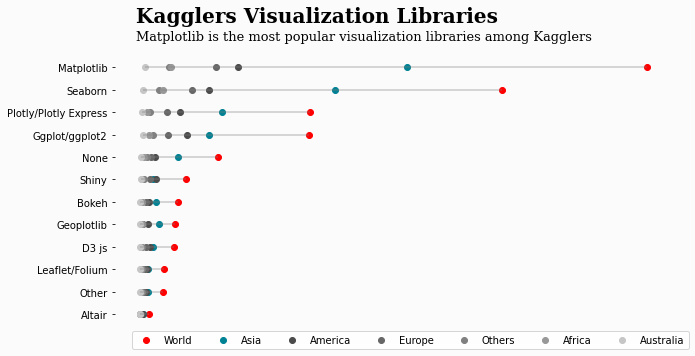

In [31]:
# Setting up figure and axes
fig = plt.figure(figsize=(10,5)) # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

y_dummy = np.arange(1,len(viz_df.index)+1)

ax0.hlines(y=y_dummy, xmin=viz_df["Min"], xmax=viz_df["Max"], color='grey', alpha=0.4, zorder=3)
ax0.scatter(viz_df['World'], y_dummy, color='red', label='World')
ax0.scatter(viz_df['Asia'], y_dummy, color='#008294', label='Asia')
ax0.scatter(viz_df['America'], y_dummy, color='#4b4b4c', label='America')
ax0.scatter(viz_df['Europe'], y_dummy, color='#676767', label='Europe')
ax0.scatter(viz_df['Others'], y_dummy, color='#808080', label='Others')
ax0.scatter(viz_df['Africa'], y_dummy, color='#989898', label='Africa')
ax0.scatter(viz_df['Australia'], y_dummy, color='#c6c6c6', label='Australia')

y_label = list(viz_df.index)
y_label.insert(0, "")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax0.set_yticklabels(y_label)
ax0.set_xticklabels([])
ax0.tick_params(bottom=False)
   
ax0.text(-100, 14, 
         'Kagglers Visualization Libraries', 
         fontsize=20, fontweight='bold', fontfamily='serif')

ax0.text(-100, 13.2, 
         'Matplotlib is the most popular visualization libraries among Kagglers ', 
         fontsize=13, fontweight='light', fontfamily='serif')

ax0.legend(loc='lower center', ncol=7, bbox_to_anchor=(0.53, -0.1))

for s in ["top","right", "left", "bottom"]:
    ax0.spines[s].set_visible(False)

<a id="kagglers-computer-vision-methods"></a>
[back to top](#table-of-contents)
### 4.8. Kagglers Computer Vision Methods 

The interesting things are:
* Kagglers around the world agree that image classification & other general purposes networks are the most popular computer vision methods.
* The differences between object detection methods, general purpose image/video tools and image segmentations method are not distinct among Kagglers except for Australia that put object detection methods at position 5 below Kagglers that not use any computer vision methods.
* Object detection methods are the second most popular methods in Asia and Africa. The rest of Kagglers  ranked these methods at position 4 and position 5 (Australia), they put General purpose image/video tools as the 2nd most popular methods.

In [32]:
vis_lst = ["Q18_Part_1", "Q18_Part_2", "Q18_Part_3", "Q18_Part_4", "Q18_Part_5", "Q18_Part_6", "Q18_OTHER"] 
vis_df = survey2020_df.groupby(["Continents"])[vis_lst].count()
vis_df.columns = ["General purpose image/video tools", "Image segmentation methods",
                  "Object detection methods", "Image classification & oth general networks",
                  "Generative Networks",
                  "None", "Other"]

vis_df = vis_df.loc[["Asia", "America", "Europe", "Others", "Africa", "Australia"], :]
vis_df = vis_df.T
vis_df["World"] = vis_df.sum(axis=1)

vis_df["World_Percentage"] = vis_df["World"].apply(lambda x: x/sum(vis_df["World"])) *100
vis_df["Asia_Percentage"] = vis_df["Asia"].apply(lambda x: x/sum(vis_df["Asia"])) *100 
vis_df["America_Percentage"] = vis_df["America"].apply(lambda x: x/sum(vis_df["America"])) *100 
vis_df["Europe_Percentage"] = vis_df["Europe"].apply(lambda x: x/sum(vis_df["Europe"])) *100 
vis_df["Others_Percentage"] = vis_df["Others"].apply(lambda x: x/sum(vis_df["Others"])) *100 
vis_df["Africa_Percentage"] = vis_df["Africa"].apply(lambda x: x/sum(vis_df["Africa"])) *100 
vis_df["Australia_Percentage"] = vis_df["Australia"].apply(lambda x: x/sum(vis_df["Australia"])) *100 
vis_df = vis_df.drop(["Asia", "America", "Europe", "Others", "Africa", "Australia", "World"], axis=1)

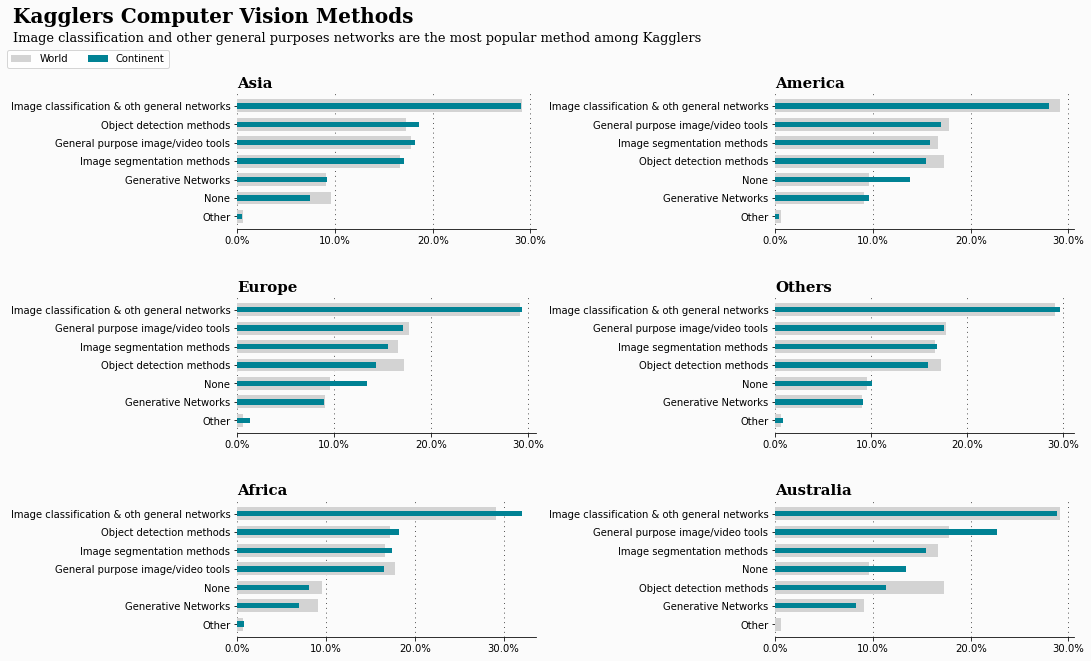

In [33]:
# Setting up figure and axes
fig = plt.figure(figsize=(15,10)) # create figure
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.8, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

ax0.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax1.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax2.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax3.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax4.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax5.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color

vis_df = vis_df.sort_values(by="Asia_Percentage", ascending=True)
ax0.barh(vis_df.index, vis_df['World_Percentage'], color="#d3d3d3", zorder=3, height=0.7)
ax0.barh(vis_df.index, vis_df['Asia_Percentage'], color="#008294", zorder=3, height=0.3)
ax0.xaxis.set_major_locator(mtick.MultipleLocator(10))

vis_df = vis_df.sort_values(by="America_Percentage", ascending=True)
ax1.barh(vis_df.index, vis_df['World_Percentage'], color="#d3d3d3", zorder=3, height=0.7)
ax1.barh(vis_df.index, vis_df['America_Percentage'], color="#008294", zorder=3, height=0.3)
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

vis_df = vis_df.sort_values(by="Europe_Percentage", ascending=True)
ax2.barh(vis_df.index, vis_df['World_Percentage'], color="#d3d3d3", zorder=3, height=0.7)
ax2.barh(vis_df.index, vis_df['Europe_Percentage'], color="#008294", zorder=3, height=0.3)
ax2.xaxis.set_major_locator(mtick.MultipleLocator(10))

vis_df = vis_df.sort_values(by="Others_Percentage", ascending=True)
ax3.barh(vis_df.index, vis_df['World_Percentage'], color="#d3d3d3", zorder=3, height=0.7)
ax3.barh(vis_df.index, vis_df['Others_Percentage'], color="#008294", zorder=3, height=0.3)
ax3.xaxis.set_major_locator(mtick.MultipleLocator(10))

vis_df = vis_df.sort_values(by="Africa_Percentage", ascending=True)
ax4.barh(vis_df.index, vis_df['World_Percentage'], color="#d3d3d3", zorder=3, height=0.7)
ax4.barh(vis_df.index, vis_df['Africa_Percentage'], color="#008294", zorder=3, height=0.3)
ax4.xaxis.set_major_locator(mtick.MultipleLocator(10))

vis_df = vis_df.sort_values(by="Australia_Percentage", ascending=True)
ax5.barh(vis_df.index, vis_df['World_Percentage'], color="#d3d3d3", zorder=3, height=0.7)
ax5.barh(vis_df.index, vis_df['Australia_Percentage'], color="#008294", zorder=3, height=0.3)
ax5.xaxis.set_major_locator(mtick.MultipleLocator(10))

ax0.legend(["World", "Continent"], loc="lower center", bbox_to_anchor=(-0.5, 1.15), ncol=2)

ax0.xaxis.set_major_formatter(mtick.PercentFormatter())  
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())  
ax2.xaxis.set_major_formatter(mtick.PercentFormatter())  
ax3.xaxis.set_major_formatter(mtick.PercentFormatter())  
ax4.xaxis.set_major_formatter(mtick.PercentFormatter())  
ax5.xaxis.set_major_formatter(mtick.PercentFormatter())  
   
ax0.text(0, 7, 'Asia',fontsize=15, fontweight='bold', fontfamily='serif')
ax1.text(0, 7, 'America', fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(0, 7, 'Europe', fontsize=15, fontweight='bold', fontfamily='serif')
ax3.text(0, 7, 'Others', fontsize=15, fontweight='bold', fontfamily='serif')
ax4.text(0, 7, 'Africa', fontsize=15, fontweight='bold', fontfamily='serif')
ax5.text(0, 7, 'Australia', fontsize=15, fontweight='bold', fontfamily='serif')

ax0.text(-23, 10.5, 'Kagglers Computer Vision Methods ', 
         fontsize=20, fontweight='bold', fontfamily='serif')

ax0.text(-23, 9.5, 
         'Image classification and other general purposes networks are the most popular method among Kagglers', 
         fontsize=13, fontweight='light', fontfamily='serif')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

<a id="kagglers-nlp-methods"></a>
[back to top](#table-of-contents)
### 4.9. Kagglers Natural Language Processing Methods

The interesting things are:
* Word embeddings/vectors are the most popular methods among Kagglers around the world.
* Encoder-decoder models are the 2nd most popular NLP methods for Asian and African Kagglers. This is very different with Kagglers in America, Europe and Australia that more prefer Transformer language models.
* Many Kaggler that live in Others continents don't use any NLP methods as it is ranked at position 2 and there is no distinct differences with Encoder-decoder models and Transformer language models.

In [34]:
nlp_lst = ["Q19_Part_1", "Q19_Part_2", "Q19_Part_3", "Q19_Part_4", "Q19_Part_5", "Q19_OTHER"] 
nlp_df = survey2020_df.groupby(["Continents"])[nlp_lst].count()
nlp_df.columns = ["Word embeddings\n/vectors", "Encoder-decoder\nmodels", "Contextualized\nembeddings", "Transformer\nlanguage models",
                  "None", "Other"]

nlp_df = nlp_df.loc[["Asia", "America", "Europe", "Others", "Africa", "Australia"], :]
nlp_df = nlp_df.T
nlp_df["World"] = nlp_df.sum(axis=1)

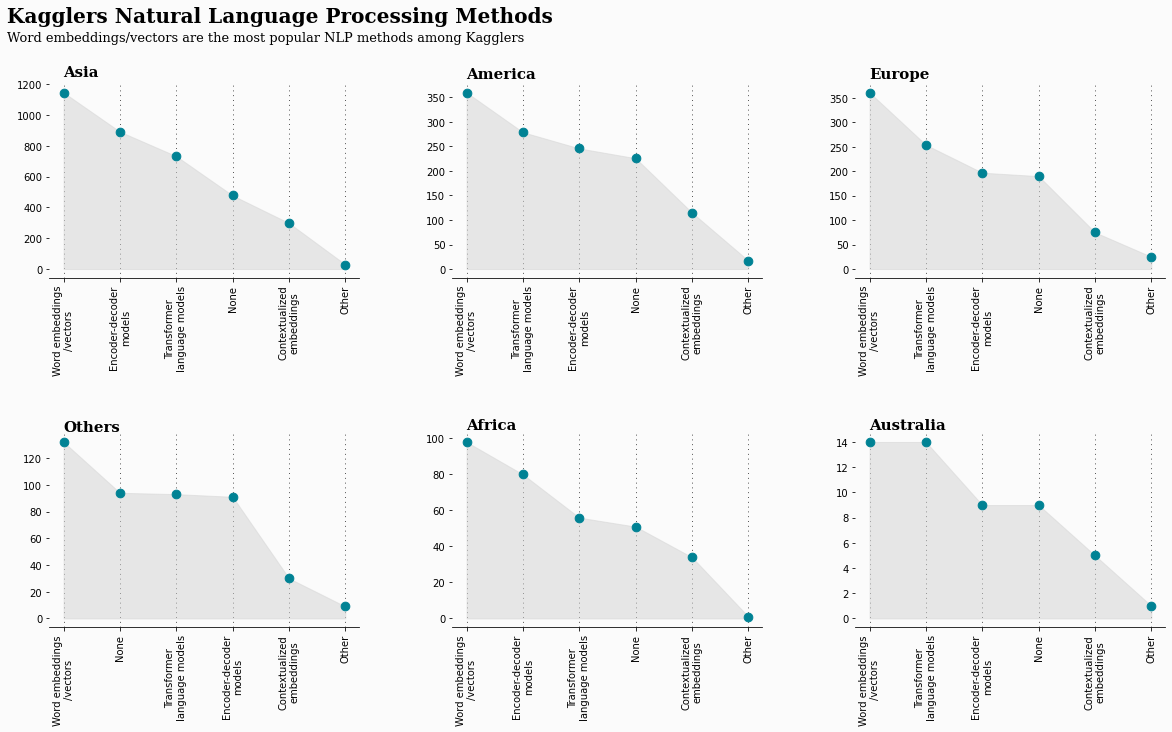

In [35]:
# Setting up figure and axes
fig = plt.figure(figsize=(20,10)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.3, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

ax0.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax1.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax2.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax3.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax4.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax5.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color

nlp_df = nlp_df.sort_values(by="Asia", ascending=False)
ax0.fill_between(x=nlp_df.index, y1=nlp_df['Asia'], color="#d3d3d3", zorder=3, alpha=0.5)
ax0.scatter(x=nlp_df.index, y=nlp_df["Asia"], s=75, color="#008294", zorder=4)
ax0.set_xticklabels(nlp_df.index, rotation=90)

nlp_df = nlp_df.sort_values(by="America", ascending=False)
ax1.fill_between(x=nlp_df.index, y1=nlp_df['America'], color="#d3d3d3", zorder=3, alpha=0.5)
ax1.scatter(x=nlp_df.index, y=nlp_df["America"], s=75, color="#008294", zorder=4)
ax1.set_xticklabels(nlp_df.index, rotation=90)

nlp_df = nlp_df.sort_values(by="Europe", ascending=False)
ax2.fill_between(x=nlp_df.index, y1=nlp_df['Europe'], color="#d3d3d3", zorder=3, alpha=0.5)
ax2.scatter(x=nlp_df.index, y=nlp_df["Europe"], s=75, color="#008294", zorder=4)
ax2.set_xticklabels(nlp_df.index, rotation=90)

nlp_df = nlp_df.sort_values(by="Others", ascending=False)
ax3.fill_between(x=nlp_df.index, y1=nlp_df['Others'], color="#d3d3d3", zorder=3, alpha=0.5)
ax3.scatter(x=nlp_df.index, y=nlp_df["Others"], s=75, color="#008294", zorder=4)
ax3.set_xticklabels(nlp_df.index, rotation=90)

nlp_df = nlp_df.sort_values(by="Africa", ascending=False)
ax4.fill_between(x=nlp_df.index, y1=nlp_df['Africa'], color="#d3d3d3", zorder=3, alpha=0.5)
ax4.scatter(x=nlp_df.index, y=nlp_df["Africa"], s=75, color="#008294", zorder=4)
ax4.set_xticklabels(nlp_df.index, rotation=90)

nlp_df = nlp_df.sort_values(by="Australia", ascending=False)
ax5.fill_between(x=nlp_df.index, y1=nlp_df['Australia'], color="#d3d3d3", zorder=3, alpha=0.5)
ax5.scatter(x=nlp_df.index, y=nlp_df["Australia"], s=75, color="#008294", zorder=4)
ax5.set_xticklabels(nlp_df.index, rotation=90)

ax0.text(0, 1250, 'Asia',fontsize=15, fontweight='bold', fontfamily='serif')
ax1.text(0, 390, 'America', fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(0, 390, 'Europe', fontsize=15, fontweight='bold', fontfamily='serif')
ax3.text(0, 140, 'Others', fontsize=15, fontweight='bold', fontfamily='serif')
ax4.text(0, 105, 'Africa', fontsize=15, fontweight='bold', fontfamily='serif')
ax5.text(0, 15, 'Australia', fontsize=15, fontweight='bold', fontfamily='serif')

ax0.text(-1, 1600, 
         'Kagglers Natural Language Processing Methods', 
         fontsize=20, fontweight='bold', fontfamily='serif')

ax0.text(-1, 1480, 
         'Word embeddings/vectors are the most popular NLP methods among Kagglers', 
         fontsize=13, fontweight='light', fontfamily='serif')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

<a id="computing"></a>
[back to top](#table-of-contents)
## 5. Computing Power
In this section, we are going to see more on hardware that are used by Kagglers on their regular basis.

<a id="kagglers-computing-platform"></a>
[back to top](#table-of-contents)
### 5.1. Kagglers Computing Platform

The interesting things are:
* Across all continents, personal computer and laptop are dominating among Kagglers especially in Africa.
* Cloud computing platform is still not as popular as PC and laptop though there are several free hosted notebooks.
* As expected, deep learning workstation is still not popular due to high price especially for personal use. 

In [36]:
continents_count_df = pd.DataFrame(survey2020_df["Q11"].value_counts())
continents_count_df = continents_count_df.reset_index(drop=False)
continents_count_df.columns = ["Platform","Count"]

asia_country_count_df = pd.DataFrame(survey2020_asia_df["Q11"].value_counts())
asia_country_count_df = asia_country_count_df.reset_index(drop=False)
asia_country_count_df.columns = ["Platform","Count"]

america_country_count_df = pd.DataFrame(survey2020_america_df["Q11"].value_counts())
america_country_count_df = america_country_count_df.reset_index(drop=False)
america_country_count_df.columns = ["Platform","Count"]

europe_country_count_df = pd.DataFrame(survey2020_europe_df["Q11"].value_counts())
europe_country_count_df = europe_country_count_df.reset_index(drop=False)
europe_country_count_df.columns = ["Platform","Count"]

others_country_count_df = pd.DataFrame(survey2020_others_df["Q11"].value_counts())
others_country_count_df = others_country_count_df.reset_index(drop=False)
others_country_count_df.columns = ["Platform","Count"]

africa_country_count_df = pd.DataFrame(survey2020_africa_df["Q11"].value_counts())
africa_country_count_df = africa_country_count_df.reset_index(drop=False)
africa_country_count_df.columns = ["Platform","Count"]

australia_country_count_df = pd.DataFrame(survey2020_australia_df["Q11"].value_counts())
australia_country_count_df = australia_country_count_df.reset_index(drop=False)
australia_country_count_df.columns = ["Platform","Count"]

Text(0, 1.2, 'Australia')

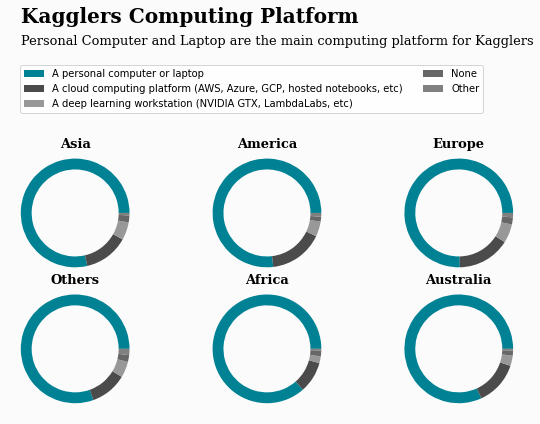

In [37]:
# Setting up figure and axes
fig = plt.figure(figsize=(10,5)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.1, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1]) # create axes
ax2 = fig.add_subplot(gs[0, 2]) # create axes
ax3 = fig.add_subplot(gs[1, 0]) # create axes
ax4 = fig.add_subplot(gs[1, 1]) # create axes
ax5 = fig.add_subplot(gs[1, 2]) # create axes

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color

color_map = ["#008294", "#4b4b4c", "#989898", "#676767", "#808080"]

# Asia
ax0.pie(x=asia_country_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))

ax0.text(0, 1.2, 
         'Asia', 
         fontsize=13, 
         fontweight='bold', 
         fontfamily='serif',
         horizontalalignment='center'
        )

ax0.text(-1, 3.5, 
         'Kagglers Computing Platform', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(-1, 3.1, 
         'Personal Computer and Laptop are the main computing platform for Kagglers', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.legend(continents_count_df["Platform"], loc='lower center', ncol=2, bbox_to_anchor=(1.8, 1.2))

# America
ax1.pie(x=america_country_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))

ax1.text(0, 1.2, 
         'America', 
         fontsize=13, 
         fontweight='bold', 
         fontfamily='serif',
         horizontalalignment='center'
        )

# Europe
ax2.pie(x=europe_country_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))

ax2.text(0, 1.2, 
         'Europe', 
         fontsize=13, 
         fontweight='bold', 
         fontfamily='serif',
         horizontalalignment='center'
        )

# Others
ax3.pie(x=others_country_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))

ax3.text(0, 1.2, 
         'Others', 
         fontsize=13, 
         fontweight='bold', 
         fontfamily='serif',
         horizontalalignment='center'
        )

# Africa
ax4.pie(x=africa_country_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))

ax4.text(0, 1.2, 
         'Africa', 
         fontsize=13, 
         fontweight='bold', 
         fontfamily='serif',
         horizontalalignment='center'
        )

# Australia
ax5.pie(x=australia_country_count_df['Count'], colors=color_map, wedgeprops=dict(width=0.2))

ax5.text(0, 1.2, 
         'Australia', 
         fontsize=13, 
         fontweight='bold', 
         fontfamily='serif',
         horizontalalignment='center'
        )

<a id="kagglers-specialized-hardware"></a>
[back to top](#table-of-contents)
### 5.2. Kagglers Specialized Hardware

The interesting things are:
* GPUs is the most popular specialized hardware among Kagglers even higher than Kagglers without any used of specialized hardware. This popularity come from Asian Kagglers and also African Kagglers.
* Except in Asia and Africa, most Kagglers don't use any specialized hardware as can be seen in America, Europe, Others and Australia though the gap is not big in those continents.
* It's still a long way to go for TPUs as its popularity is still far compare to GPUs.

In [38]:
sp_hdw_lst = ["Q12_Part_1", "Q12_Part_2", "Q12_Part_3", "Q12_OTHER"] 
sp_hdw_df = survey2020_df.groupby(["Continents"])[sp_hdw_lst].count()
sp_hdw_df.columns = ["GPUs", "TPUs", "None", "Other"]     
sp_hdw_df = sp_hdw_df.loc[["Asia", "America", "Europe", "Others", "Africa", "Australia"], :]
sp_hdw_df = sp_hdw_df.T.sort_values(by="Asia", ascending=False)
sp_hdw_df["World"] = sp_hdw_df.sum(axis=1)
first_col = sp_hdw_df.pop("World")
sp_hdw_df.insert(0, "World", first_col)

sp_hdw_df["World_Percentage"] = sp_hdw_df["World"].apply(lambda x: (x/sum(sp_hdw_df["World"])*100))
sp_hdw_df["Asia_Percentage"] = sp_hdw_df["Asia"].apply(lambda x: (x/sum(sp_hdw_df["Asia"])*100))
sp_hdw_df["America_Percentage"] = sp_hdw_df["America"].apply(lambda x: (x/sum(sp_hdw_df["America"])*100))
sp_hdw_df["Europe_Percentage"] = sp_hdw_df["Europe"].apply(lambda x: (x/sum(sp_hdw_df["Europe"])*100))
sp_hdw_df["Others_Percentage"] = sp_hdw_df["Others"].apply(lambda x: (x/sum(sp_hdw_df["Others"])*100))
sp_hdw_df["Africa_Percentage"] = sp_hdw_df["Africa"].apply(lambda x: (x/sum(sp_hdw_df["Africa"])*100))
sp_hdw_df["Australia_Percentage"] = sp_hdw_df["Australia"].apply(lambda x: (x/sum(sp_hdw_df["Australia"])*100))

sp_hdw_df = sp_hdw_df.drop(["Asia", "America", "Europe", "Others", "Africa", "Australia", "World"], axis=1) 

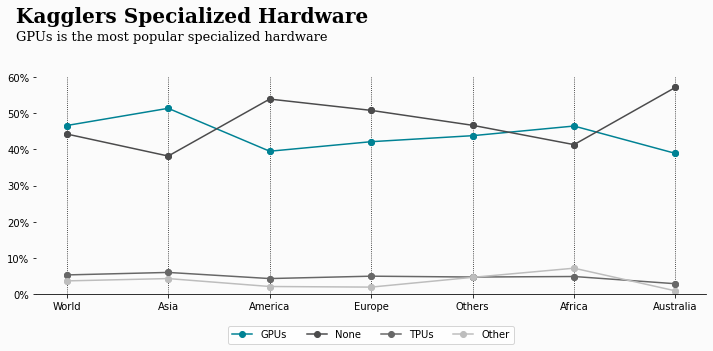

In [39]:
# Setting up figure and axes
fig = plt.figure(figsize=(12,4)) # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0], ylim=(0,60))

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

ax0.grid(color='black', linestyle=':', axis='x', zorder=0)

ax0.scatter(np.arange(7), sp_hdw_df.loc["GPUs",:], marker="o", color="#008294")
ax0.scatter(np.arange(7), sp_hdw_df.loc["None",:], marker="o", color="#4b4b4c")
ax0.scatter(np.arange(7), sp_hdw_df.loc["TPUs",:], marker="o", color="#676767")
ax0.scatter(np.arange(7), sp_hdw_df.loc["Other",:], marker="o", color="#bdbdbd")

ax0.plot(np.arange(7), sp_hdw_df.loc["GPUs",:], marker="o", color="#008294")
ax0.plot(np.arange(7), sp_hdw_df.loc["None",:], marker="o", color="#4b4b4c")
ax0.plot(np.arange(7), sp_hdw_df.loc["TPUs",:], marker="o", color="#676767")
ax0.plot(np.arange(7), sp_hdw_df.loc["Other",:], marker="o", color="#bdbdbd")

ax0.yaxis.set_major_formatter(mtick.PercentFormatter())    
ax0.set_xticklabels(["", "World", "Asia", "America", "Europe", "Others", "Africa", "Australia"])
ax0.legend(sp_hdw_df.index, loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=4)
  
ax0.text(-0.5, 75, 
         'Kagglers Specialized Hardware', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(-0.5, 70, 
         'GPUs is the most popular specialized hardware', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

<a id="kagglers-cloud-computing-platform"></a>
[back to top](#table-of-contents)
### 5.3. Kagglers Cloud Computing Platform

The interesting things are:
* Amazon Web Services is the king of cloud computing platform among Kagglers. 
* Kagglers around the world agree that top 3 cloud computing platform are Amazon Web Services (AWS), Google Cloud Platform (GCP) and Microsoft Azure though the position are different in every continents.
* In Asia, the differences between AWS and GCP are not far enough followed by Kagglers that don't use cloud computing platform.
* American Kagglers prefer AWS than GCP as the gap is quite far and Azure in the third place following the GCP.
* European Kagglers preferences is more like Asian Kagglers with AWS and GCP are the leading cloud computing platform but in Europe, the gap between AWS and GCP is more far than in Asia.
* In Others continents, Kagglers user of AWS and GCP are almost the same. The gap between AWS, GCP, Azure and None are not far enough.
* African Kagglers choose GCP more than AWS while the Azure in 4th position following Kagglers without use of any cloud computing platform.
* Only in Australia, Azure get the 2nd position above GCP but the most popular cloud computing is still AWS with quite a big gap. 

In [40]:
cloud_lst = ["Q26_A_Part_1", "Q26_A_Part_2", "Q26_A_Part_3", "Q26_A_Part_4", "Q26_A_Part_5", "Q26_A_Part_6", "Q26_A_Part_7", 
           "Q26_A_Part_8", "Q26_A_Part_9", "Q26_A_Part_10", "Q26_A_Part_11", "Q26_A_OTHER"] 
cloud_df = survey2020_df.groupby(["Continents"])[cloud_lst].count()
cloud_df.columns = ["Amazon Web Services", "Microsoft Azure", "Google Cloud Platform", "IBM Cloud/Red Hat", "Oracle Cloud", 
                  "SAP Cloud", "Salesforce Cloud", "VMware Cloud", "Alibaba Cloud", "Tencent Cloud", "None", "Other"]
cloud_df = cloud_df.loc[["Asia", "America", "Europe", "Others", "Africa", "Australia"], :]
cloud_df = cloud_df.T

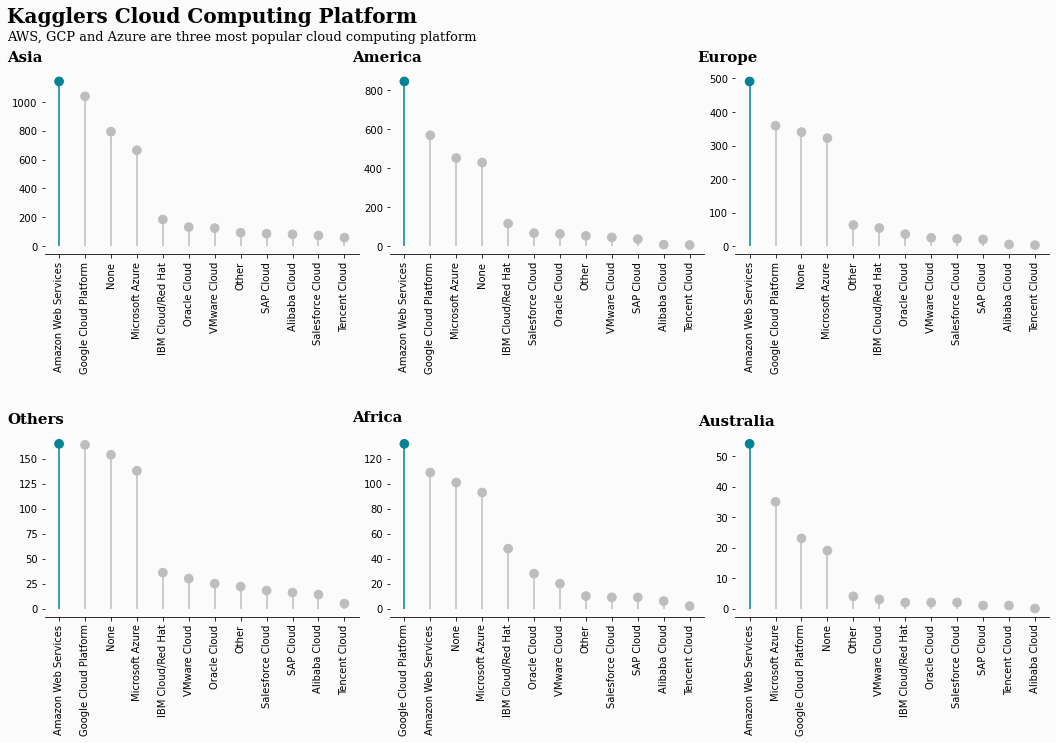

In [41]:
# Setting up figure and axes
fig = plt.figure(figsize=(18,10)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.1, hspace=1)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color

color_map = ["#bdbdbd" for _ in range(12)]
color_map[0] = "#008294"

cloud_df = cloud_df.sort_values(by="Asia", ascending=False)
ax0.vlines(x=cloud_df.index, ymin=0, ymax=cloud_df["Asia"], color=color_map)
ax0.scatter(x=cloud_df.index, y=cloud_df["Asia"], s=75, color=color_map)
ax0.set_xticklabels(cloud_df.index, rotation=90)
cloud_df = cloud_df.sort_values(by="America", ascending=False)
ax1.vlines(x=cloud_df.index, ymin=0, ymax=cloud_df["America"], color=color_map)
ax1.scatter(x=cloud_df.index, y=cloud_df["America"], s=75, color=color_map)
ax1.set_xticklabels(cloud_df.index, rotation=90)
cloud_df = cloud_df.sort_values(by="Europe", ascending=False)
ax2.vlines(x=cloud_df.index, ymin=0, ymax=cloud_df["Europe"], color=color_map)
ax2.scatter(x=cloud_df.index, y=cloud_df["Europe"], s=75, color=color_map)
ax2.set_xticklabels(cloud_df.index, rotation=90)
cloud_df = cloud_df.sort_values(by="Others", ascending=False)
ax3.vlines(x=cloud_df.index, ymin=0, ymax=cloud_df["Others"], color=color_map)
ax3.scatter(x=cloud_df.index, y=cloud_df["Others"], s=75, color=color_map)
ax3.set_xticklabels(cloud_df.index, rotation=90)
cloud_df = cloud_df.sort_values(by="Africa", ascending=False)
ax4.vlines(x=cloud_df.index, ymin=0, ymax=cloud_df["Africa"], color=color_map)
ax4.scatter(x=cloud_df.index, y=cloud_df["Africa"], s=75, color=color_map)
ax4.set_xticklabels(cloud_df.index, rotation=90)
cloud_df = cloud_df.sort_values(by="Australia", ascending=False)
ax5.vlines(x=cloud_df.index, ymin=0, ymax=cloud_df["Australia"], color=color_map)
ax5.scatter(x=cloud_df.index, y=cloud_df["Australia"], s=75, color=color_map)
ax5.set_xticklabels(cloud_df.index, rotation=90)

ax0.text(-2, 1280, 'Asia',fontsize=15, fontweight='bold', fontfamily='serif')
ax1.text(-2, 950, 'America', fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(-2, 550, 'Europe', fontsize=15, fontweight='bold', fontfamily='serif')
ax3.text(-2, 185, 'Others', fontsize=15, fontweight='bold', fontfamily='serif')
ax4.text(-2, 150, 'Africa', fontsize=15, fontweight='bold', fontfamily='serif')
ax5.text(-2, 60, 'Australia', fontsize=15, fontweight='bold', fontfamily='serif')

ax0.text(-2, 1550, 
         'Kagglers Cloud Computing Platform', 
         fontsize=20, fontweight='bold', fontfamily='serif')

ax0.text(-2, 1430, 
         'AWS, GCP and Azure are three most popular cloud computing platform', 
         fontsize=13, fontweight='light', fontfamily='serif')

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

Updating the heatmap bar, thank you to @Jihjohn for figuring up the mistake. I'm sorry for slow update. As a beginners, I still need many things to learn. I hope you enjoy it. Any input are very welcome...